In [202]:
# from google.colab import drive
# drive.mount('/content/drive')

In [203]:
# pip install category_encoders

<center><h1>Used Car Saudi Arabia Price Prediction at syarah.com</h1></center>


---



# 1. Business Background

- **Company Overview**: Syarah is a Saudi Arabian company specializing in selling guaranteed used and new cars online, offering a seamless and convenient buying experience with home delivery and comprehensive warranties.
- **Mission and Goals**: The company aims to modernize the used car market in Saudi Arabia by providing transparent, reliable, and high-quality services, including car evaluations, maintenance, and repair services.
- **Investments**: Syarah has secured significant investments, including 7.5 million SAR in 2018 and 20 million USD in 2021, from reputable investors like Elm Company and Beco Capital.
- **Awards and Recognition**: The company has received several accolades, including being named the most promising company in the Middle East in 2019 and winning the Startup of the Year award in 2021.


---

Summary of the key points about the car trading company from the current page:

- **Comprehensive Inspection**: Used cars are inspected at over **200 points** to ensure quality.
- **Warranty and Return Policy**: Offers a **one-year warranty** and a **10-day return policy** for used cars.
- **Convenient Purchase**: Allows customers to **buy cars online** and have them delivered to their doorstep.
- **Investment and Growth**: The company has received significant investments and has been recognized with several awards for its promising growth and quality services.

## 1.1. Context

### Stakeholder
The company provides comprehensive services like car evaluation and condition verification, which likely involve determining the price of used cars. These tasks are typically handled by departments such as Sales or Valuation teams in similar businesses.

Some information about the criteria for good quality used cars on this page. Here are the key points:

- **Comprehensive Inspection**: Used cars are inspected at over 200 points to ensure their quality.
- **Warranty**: They offer a one-year warranty on used cars.
- **Return Policy**: Customers can return the car within 10 days if they are not satisfied, without any reason.

These criteria help ensure that customers receive reliable and high-quality used cars

## 1.2. Business Problem

Predicting the price of used cars in Saudi Arabia based on various features like type, region, make, gear type, origin, options, year, engine size, and mileage.

## 1.3. Goals

Develop a model to accurately predict used car prices, provide insights into price ranges, and categorize cars by type to assist in pricing strategies.

## 1.4. Analytic Approach

The approach involves using regression models to predict car prices. Various models like Linear Regression, KNN, Decision Tree, Ridge, Lasso, Random Forest, XGBoost, ElasticNet, AdaBoost, and Gradient Boosting are benchmarked and evaluated.

## 1.5. Metrics Evaluation

# 2. Libraries

In [204]:
# Data Manipulation
import pandas as pd
import numpy as np
import time

# Model Algorithm (modeling)
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline

# Ensemble
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor

# Data Preparation
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, StratifiedKFold, KFold
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import category_encoders as ce
import xgboost as xgb
# from sklearn.compose import TransformedTargetRegressor

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Train Test Split
from sklearn.model_selection import train_test_split

# Scaling
from sklearn.preprocessing import RobustScaler, StandardScaler

# Evaluation metrics
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score

# Warning
import warnings
warnings.filterwarnings("ignore")

# Load dataset
# df = pd.read_csv('/content/drive/MyDrive/Purwadhika/Capstone 3 & 4/Saudi Arabia Used Cars/data_saudi_used_cars.csv')
df = pd.read_csv('data_saudi_used_cars.csv')
df_og_row = df.shape[0]

# 3. Data Understanding

| Feature | Description |
| --- | --- |
Type | Type of used car.
Region | The region in which the used car was offered for sale.
Make | The company name.
Gear_Type | Gear type size of used car.
Origin | Origin of used car.
Options | Options of used car.
Year | Manufacturing year.
Engine_Size | The engine size of used car.
Mileage | Mileage of used car
Negotiable | True if the price is 0, that means it is negotiable.
Price | Used car price

In [205]:
df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000


## 3.1. Exploratory Data Analysis (EDA)

In [206]:
categorical_columns = df.select_dtypes(include=['object'])
categorical_columns.head()

,Type,Region,Make,Gear_Type,Origin,Options
0,Corolla,Abha,Toyota,Manual,Saudi,Standard
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full


In [208]:
# # categorical histogram

# fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# for ax, col, title, xlabel, ylabel in zip(axs, ['Type', 'Region'], ['Type Histogram', 'Region Histogram'],
#                                            ['Type', 'Region'], ['Frequency of type', 'Frequency of region']):
#     top_values = df[col].value_counts().nlargest(10)
#     ax.barh(range(len(top_values)), top_values)
#     ax.set_yticks(range(len(top_values)))
#     ax.set_yticklabels(top_values.index)
#     ax.set_title(title)
#     ax.set_xlabel(xlabel)
#     ax.set_ylabel(ylabel)

# # region feature
# # Type feature

# # make feature
# plt.figure(figsize=(5, 3))
# top_values = df.Make.value_counts().nlargest(10)
# plt.barh(range(len(top_values)), top_values)
# plt.yticks(range(len(top_values)), top_values.index)
# plt.title('Make Histogram')
# plt.xlabel('Frequency of make')
# plt.ylabel('Make')

# # gear feature
# plt.figure(figsize=(5, 3))
# top_values = df.Gear_Type.value_counts().nlargest(10)
# plt.barh(range(len(top_values)), top_values)
# plt.yticks(range(len(top_values)), top_values.index)
# plt.title('Gear Type Histogram')
# plt.xlabel('Frequency of gear type')
# plt.ylabel('Gear Type')

# # car option feature
# plt.figure(figsize=(5, 3))
# top_values = df.Options.value_counts().nlargest(10)
# plt.barh(range(len(top_values)), top_values)
# plt.yticks(range(len(top_values)), top_values.index)
# plt.title('Car Options Histogram')
# plt.xlabel('Frequency of car options')
# plt.ylabel('Car Options')

# # origin feature
# plt.figure(figsize=(5, 3))
# top_values = df.Origin.value_counts().nlargest(10)
# plt.barh(range(len(top_values)), top_values)
# plt.yticks(range(len(top_values)), top_values.index)
# plt.title('Origin Histogram')
# plt.xlabel('Frequency of origin')
# plt.ylabel('Origin')

# plt.show()

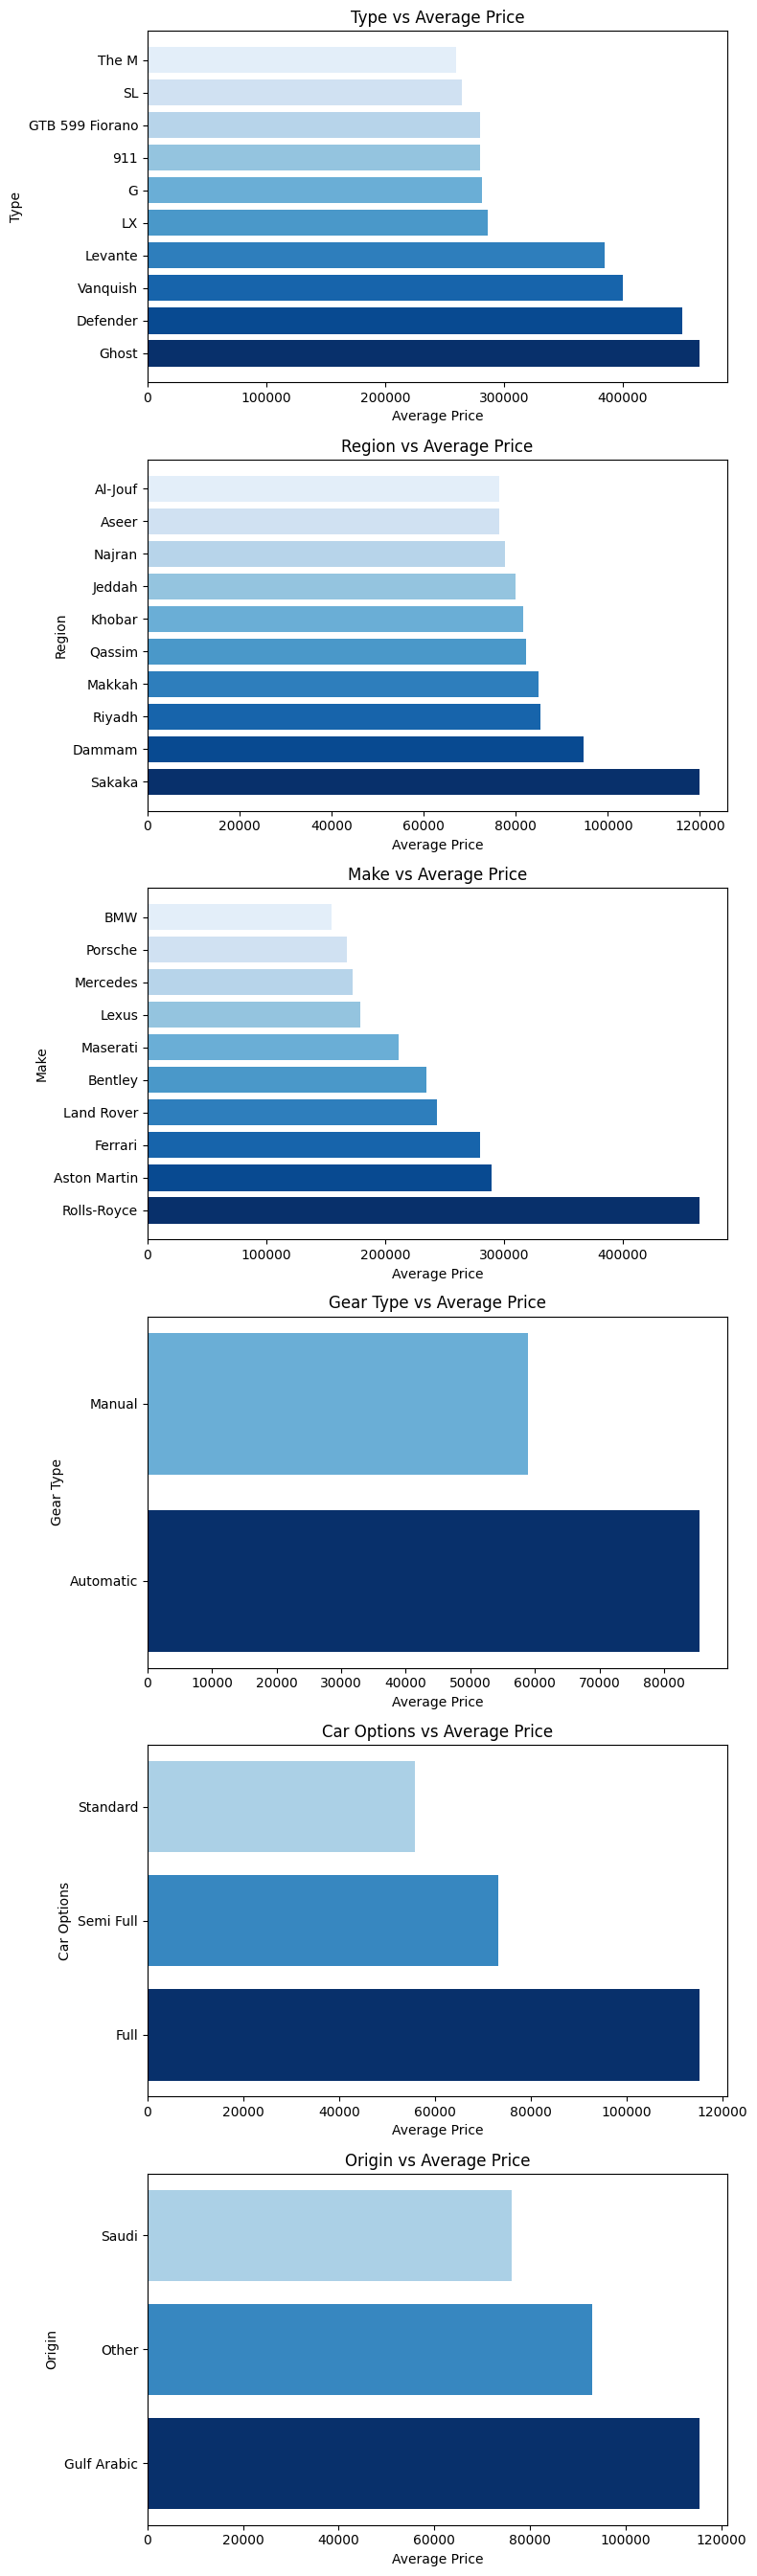

In [303]:
fig, axs = plt.subplots(6, 1, figsize=(8, 3*9), sharey=False)

features = ['Type', 'Region', 'Make', 'Gear_Type', 'Options', 'Origin']
titles = ['Type vs Average Price', 'Region vs Average Price', 'Make vs Average Price', 'Gear Type vs Average Price', 'Car Options vs Average Price', 'Origin vs Average Price']
xlabels = ['Average Price', 'Average Price', 'Average Price', 'Average Price', 'Average Price', 'Average Price']
ylabels = ['Type', 'Region', 'Make', 'Gear Type', 'Car Options', 'Origin']

cmap = plt.cm.Blues  # Define the color map
for ax, feature, title, xlabel, ylabel in zip(axs, features, titles, xlabels, ylabels):
    avg_price = df.groupby(feature)['Price'].mean().nlargest(10)
    ax.barh(range(len(avg_price)), avg_price, color=[cmap(1 - i/len(avg_price)) for i in range(len(avg_price))])  # Use the color map
    ax.set_yticks(range(len(avg_price)))
    ax.set_yticklabels(avg_price.index)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

fig.subplots_adjust(hspace=0.5)  # Add space between subplots
plt.tight_layout()
plt.show()

## 3.2. Check Data

In [210]:
pd.set_option('display.max_colwidth',None)

pd.DataFrame({
    'Feature':df.columns.values,
    'Data type':df.dtypes.values,
    'Null':df.isna().mean().values * 100,
    'Negative': [True if df[i].dtype == int and (df[i] < 0).any else False for i in df.columns],
    'N unique':df.nunique().values,
    'Sample unique':[df[i].unique() for i in df.columns]
})

,Feature,Data type,Null,Negative,N unique,Sample unique
0,Type,object,0.0,False,347,"[Corolla, Yukon, Range Rover, Optima, FJ, CX3, Cayenne S, Sonata, Avalon, LS, C300, Land Cruiser, Hilux, Tucson, Caprice, Sunny, Pajero, Azera, Focus, 5, Spark, Camry, Pathfinder, Accent, ML, Tahoe, Yaris, Suburban, A, Altima, Traverse, Expedition, Senta fe, Liberty, 3, X, Elantra, Land Cruiser Pickup, VTC, Malibu, The 5, A8, Patrol, Grand Cherokee, SL, Previa, SEL, Aveo, MKZ, Victoria, Datsun, Flex, GLC, ES, Edge, 6, Escalade, Innova, Navara, H1, G80, Carnival, Symbol, Camaro, Accord, Avanza, Land Cruiser 70, Taurus, C5700, Impala, Optra, S, Other, Cerato, Furniture, Murano, Explorer, LX, Pick up, Charger, H6, BT-50, Hiace, Ranger, Fusion, Rav4, Ciocca, CX9, Kona, Sentra, Sierra, Durango, CT-S, Sylvian Bus, Navigator, Opirus, Marquis, The 7, FX, Creta, ...]"
1,Region,object,0.0,False,27,"[Abha, Riyadh, Hafar Al-Batin, Aseer, Makkah, Dammam, Yanbu, Al-Baha, Jeddah, Hail, Khobar, Al-Ahsa, Jazan, Al-Medina, Al-Namas, Tabouk, Taef, Qassim, Arar, Jubail, Sabya, Al-Jouf, Najran, Wadi Dawasir, Qurayyat, Sakaka, Besha]"
2,Make,object,0.0,False,58,"[Toyota, GMC, Land Rover, Kia, Mazda, Porsche, Hyundai, Lexus, Chrysler, Chevrolet, Nissan, Mitsubishi, Ford, MG, Mercedes, Jeep, BMW, Audi, Lincoln, Cadillac, Genesis, Renault, Honda, Suzuki, Zhengzhou, Dodge, HAVAL, INFINITI, Isuzu, Changan, Aston Martin, Mercury, Great Wall, Other, Rolls-Royce, MINI, Volkswagen, BYD, Geely, Victory Auto, Classic, Jaguar, Daihatsu, Maserati, Hummer, GAC, Lifan, Bentley, Chery, Peugeot, Foton, Škoda, Fiat, Iveco, SsangYong, FAW, Tata, Ferrari]"
3,Gear_Type,object,0.0,False,2,"[Manual, Automatic]"
4,Origin,object,0.0,False,4,"[Saudi, Gulf Arabic, Other, Unknown]"
5,Options,object,0.0,False,3,"[Standard, Full, Semi Full]"
6,Year,int64,0.0,True,50,"[2013, 2014, 2015, 2020, 2019, 2012, 2016, 1998, 2011, 2008, 1982, 1985, 2018, 1983, 2021, 2017, 2002, 2010, 2009, 2004, 2001, 1986, 2007, 1999, 2005, 1977, 1991, 2003, 1995, 2006, 1997, 1993, 1996, 2000, 1990, 1965, 1980, 1987, 1994, 1988, 1989, 1978, 2022, 1975, 1964, 1984, 1979, 1992, 1963, 1981]"
7,Engine_Size,float64,0.0,False,71,"[1.4, 8.0, 5.0, 2.4, 4.0, 2.0, 4.8, 3.5, 4.6, 5.7, 2.7, 1.0, 3.0, 1.6, 1.5, 3.3, 6.2, 2.5, 5.3, 3.6, 5.4, 1.7, 3.7, 9.0, 4.7, 4.5, 3.8, 5.5, 2.6, 1.8, 1.2, 6.0, 6.9, 3.2, 5.9, 2.2, 5.6, 1.1, 2.9, 4.1, 1.3, 4.4, 2.8, 3.4, 8.8, 6.1, 7.0, 1.9, 7.5, 4.3, 6.5, 3.1, 6.3, 6.4, 5.8, 8.5, 2.3, 6.6, 7.2, 4.2, 5.1, 7.4, 5.2, 2.1, 6.7, 7.8, 3.9, 8.7, 4.9, 6.8, 8.9]"
8,Mileage,int64,0.0,True,1716,"[421000, 80000, 140000, 220000, 49000, 25000, 189000, 155, 110864, 300, 200, 79000, 299000, 17000, 209, 340000, 30000, 71000, 85000, 500000, 290, 74715, 250, 284000, 98000, 3400, 108, 350000, 550000, 204000, 139240, 296, 105920, 187000, 10000, 18500, 292000, 280000, 270000, 345500, 110000, 247000, 55800, 92000, 27000, 600000, 307801, 62000, 38000, 89000, 137000, 422000, 208000, 11000, 245000, 500, 150000, 81000, 156000, 42000, 228000, 24000, 266000, 98100, 182000, 210800, 88000, 214000, 82808, 4000, 417970, 70000, 115, 270373, 91440, 45000, 96000, 50100, 35449, 180, 66200, 100, 349000, 168000, 105000, 130000, 212000, 139740, 256, 280, 73000, 240000, 866, 216, 183000, 148000, 4358765, 188257, 117000, 160000, ...]"
9,Negotiable,bool,0.0,False,2,"[True, False]"


# 4. Data Preparation

## 4.1. Data Cleaning

### 4.1.1. Duplicate

In [211]:
# Check duplicates
print(f'Duplicated data: {df.duplicated().sum()}')
print(f'Duplicated data percentage: {df.duplicated().sum()/len(df)*100:.2f}%')

Duplicated data: 4
Duplicated data percentage: 0.07%


In [212]:
duplicates = df.groupby(df.columns.tolist()).size().reset_index(name='count')
duplicates = duplicates[duplicates['count'] > 1]

# drop duplicate data
df.drop_duplicates(inplace=True)
print(f'Duplicated data: {df.duplicated().sum()}')

Duplicated data: 0


In [213]:
numerical = ['Year','Engine_Size','Mileage','Price']
categorical = ['Type','Region','Make','Gear_Type','Origin','Options']

### 4.1.2. Outliers

In [214]:
def calculate_outliers(data,column):
    Q1 = data[column].quantile(.25)
    Q3 = data[column].quantile(.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_data = []

for i in numerical:
    outliers_result, lower_bound, upper_bound = calculate_outliers(df,i)
    total_outlier = len(outliers_result)
    outlier_percentage = round(total_outlier/len(df[i])*100,2)
    outlier_data.append([i,total_outlier,outlier_percentage,lower_bound,upper_bound])

outlier_df = pd.DataFrame(outlier_data,columns=['column','total_outlier','percentage','lower_bound','upper_bound'])
outlier_df

,column,total_outlier,percentage,lower_bound,upper_bound
0,Year,246,4.38,2003.00,2027.00
1,Engine_Size,23,0.41,-1.75,8.25
2,Mileage,175,3.11,-199000.00,433000.00
3,Price,261,4.64,-109500.00,182500.00


Good quality cars for syarah.com:
- Relatively new or modern manufacturing year
- Low mileage
- Compliance with government regulations
- Environmentally friendly
- Fuel efficiency
- Safety

In Saudi Arabia, larger engine sizes (e.g., V6, V8) are generally popular due to the country's vast terrain and the preference for powerful vehicles. However, smaller engines (e.g., 1.5L, 2.0L) are becoming more common with the increasing awareness of fuel efficiency and environmental concerns.

Larger engines tend to consume more fuel, which might have been less of a concern historically due to lower fuel prices in Saudi Arabia. However, with recent economic reforms and fuel price adjustments, fuel economy is becoming an important factor for buyers.

Mileage affects car quality:

- Consider Car Age: The age of the car (manufacturing year) usually affects how important mileage is to sellers and buyers. Older cars with low mileage may be more valuable than new cars with high mileage.

High mileage:
- Reduced car performance
- Requires more maintenance
- Regular servicing needed - some parts may need replacement
- Potential emissions may not meet standards

#### 1. Mileage

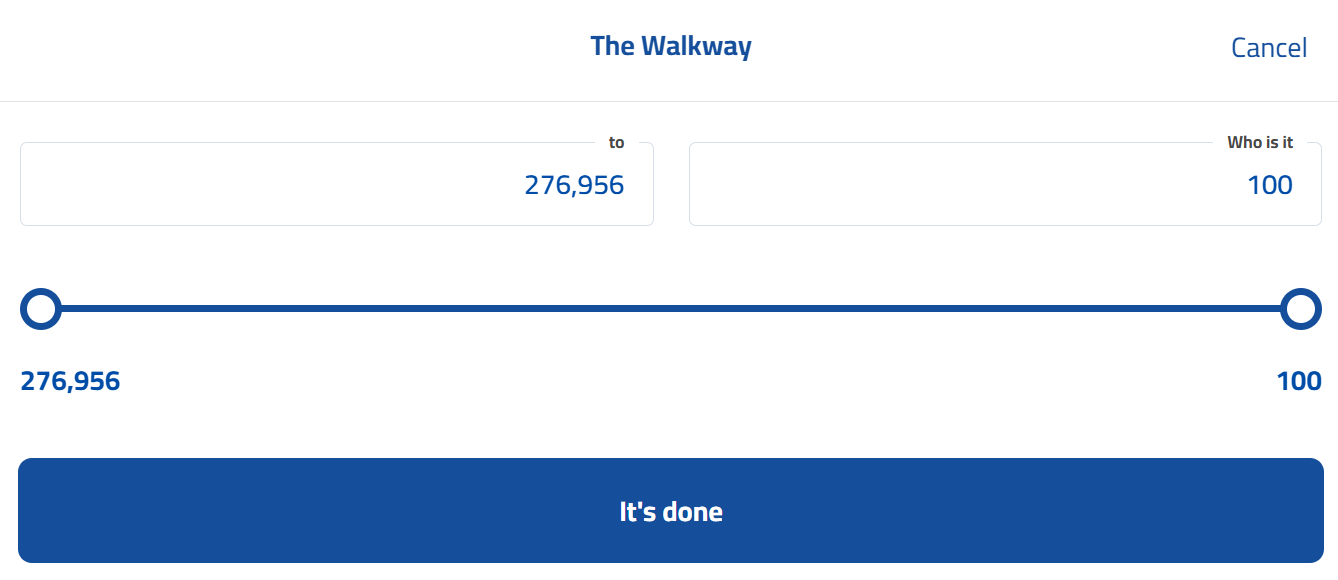

Text(0.5, 1.0, 'Mileage Spread')

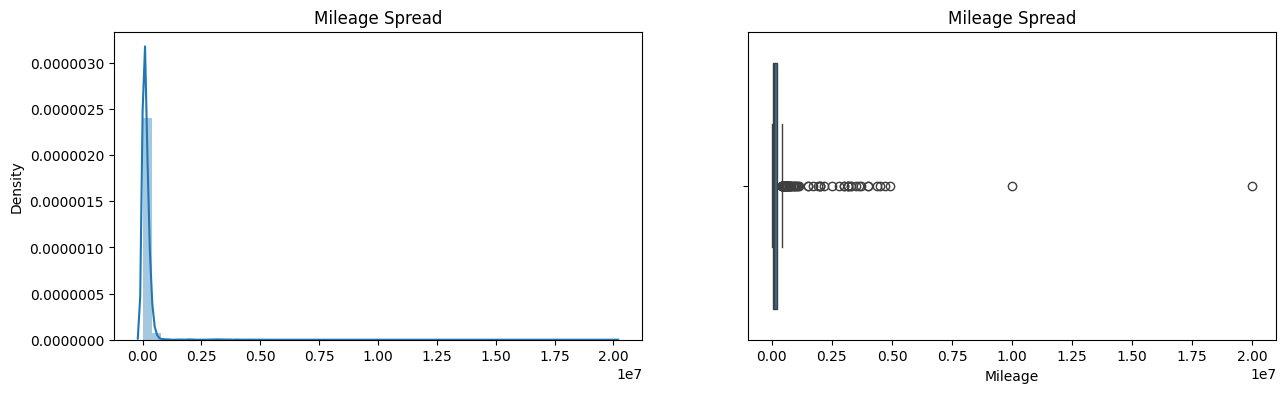

In [215]:
# Mileage skewness and distribution
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Mileage Spread')
sns.distplot(x=df['Mileage'])
plt.ticklabel_format(useOffset=False, style='plain', axis=('y'))

plt.subplot(1,2,2)
sns.boxplot(df,x='Mileage')
plt.title('Mileage Spread')

The specific mileage thresholds (5,000 kilometers as a minimum and 300,000 kilometers as a maximum) were based on general industry knowledge and common practices observed in various international automotive markets. These are not sourced from a single authoritative document or study specific to Saudi Arabia.

To find more precise and localized data for Saudi Arabia, may need to consult:
- **Local automotive market reports:** These reports might be published by market research firms or automotive industry associations in Saudi Arabia.
- **Data from major car dealerships:** They often compile and analyze data on used car sales, including mileage trends.
- **Online platforms:** Such as syarah.com or similar, which provide insights into the used car market in Saudi Arabia.

In [216]:
df.sort_values(by='Mileage',ascending=False)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
3403,Optra,Riyadh,Chevrolet,Manual,Other,Semi Full,2009,1.6,20000000,False,9000
1224,POS24,Aseer,Mercedes,Manual,Other,Full,1983,8.0,9999999,True,0
5514,Aurion,Qassim,Toyota,Automatic,Saudi,Standard,2010,3.5,4900000,True,0
1285,Tahoe,Al-Jouf,Chevrolet,Automatic,Saudi,Semi Full,2012,5.3,4691232,True,0
572,Camry,Yanbu,Toyota,Automatic,Other,Full,1998,2.5,4500000,False,15000
...,...,...,...,...,...,...,...,...,...,...,...
1145,Accord,Al-Ahsa,Honda,Automatic,Gulf Arabic,Standard,2008,2.4,100,True,0
1783,Land Cruiser 70,Tabouk,Toyota,Manual,Gulf Arabic,Semi Full,2016,4.0,100,True,0
1130,CT5,Jeddah,Cadillac,Automatic,Gulf Arabic,Semi Full,2021,2.0,100,False,179000
5251,Sierra,Dammam,GMC,Automatic,Saudi,Full,2021,9.0,100,False,178000


In [217]:
df.Mileage.describe()

count    5.620000e+03
mean     1.509222e+05
std      3.829633e+05
min      1.000000e+02
25%      3.800000e+04
50%      1.030000e+05
75%      1.960000e+05
max      2.000000e+07
Name: Mileage, dtype: float64

In [218]:
df[df['Mileage'] >= 300000].shape[0]

620

In [219]:
df = df[(df['Mileage'] <= 300000)]

In [220]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5090.0,2014.720432,5.355640,1963.0,2013.0,2016.0,2018.0,2022.0
Engine_Size,5090.0,3.252652,1.503520,1.0,2.0,3.0,4.0,9.0
Mileage,5090.0,104458.102358,84227.079934,100.0,30000.0,91781.0,162875.0,300000.0
Price,5090.0,56280.686248,72246.541310,0.0,0.0,40000.0,76000.0,850000.0


#### 2. Year

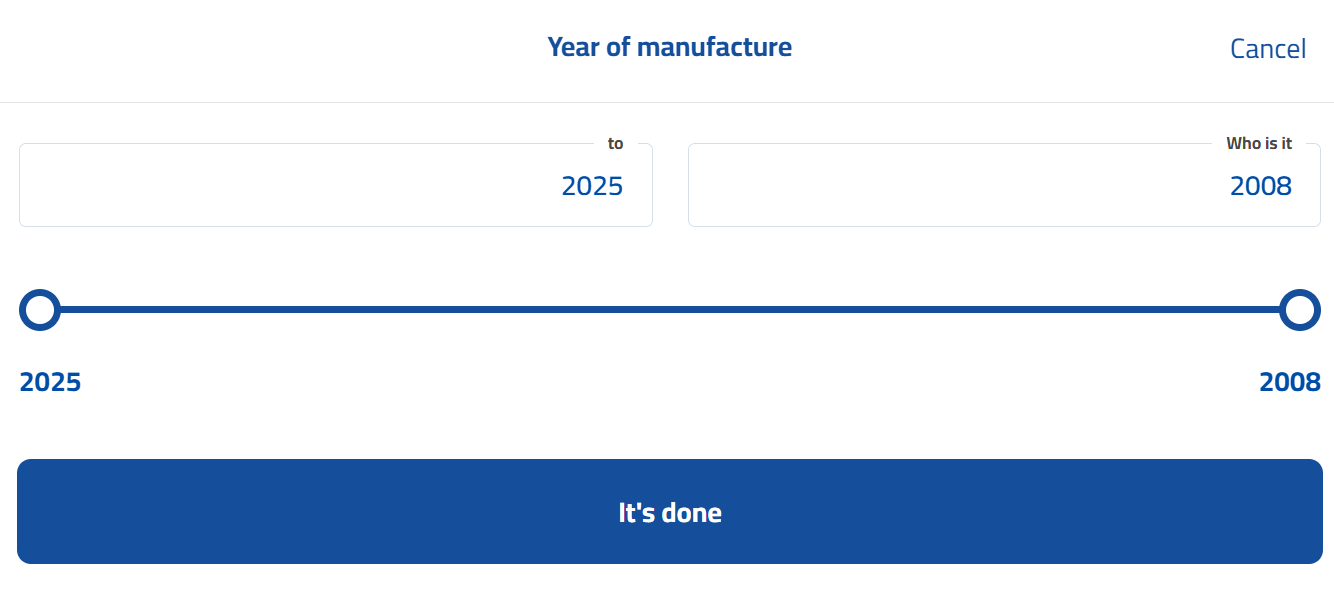

Syarah.com is an online platform that generally provides used car buying and selling services in Saudi Arabia. They tend to focus on selling used cars with relatively new or modern manufacturing years. Classic cars or those manufactured in the 1970s may not always be generally available on this platform, unless a seller specifically offers such types of cars.

Text(0.5, 1.0, 'Year Spread')

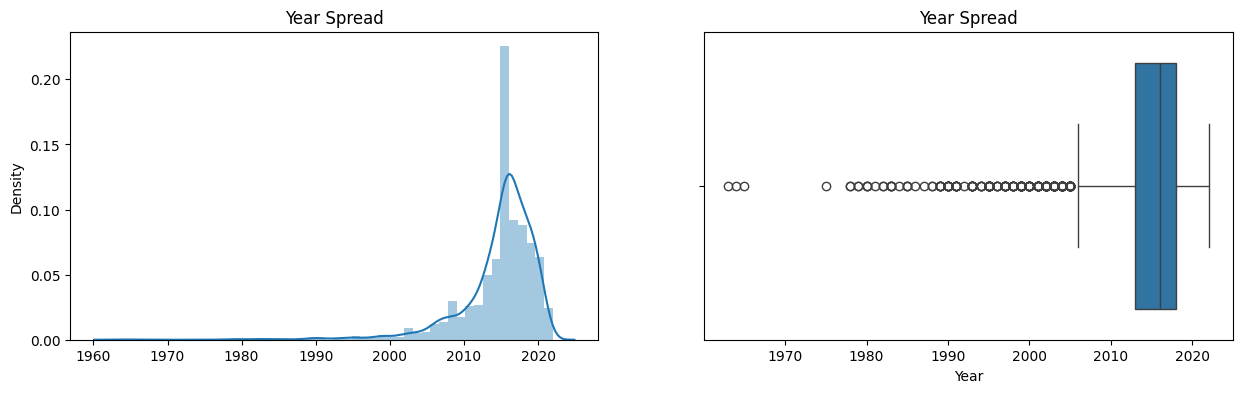

In [221]:
# Year skewness and distribution
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Year Spread')
sns.distplot(x=df['Year'])
plt.ticklabel_format(useOffset=False, style='plain', axis=('y'))

plt.subplot(1,2,2)
sns.boxplot(df,x='Year')
plt.title('Year Spread')

Based on syarah.com

2025 - 2008 = 17

Using threshold :

2021 - 17 = 2004

2004 - 2021

In [222]:
df = df[df['Year'] >= 2004]
print(f"Under 2004: {df[df['Year'] <= 2004].shape[0]}")

Under 2004: 31


#### 3. Price

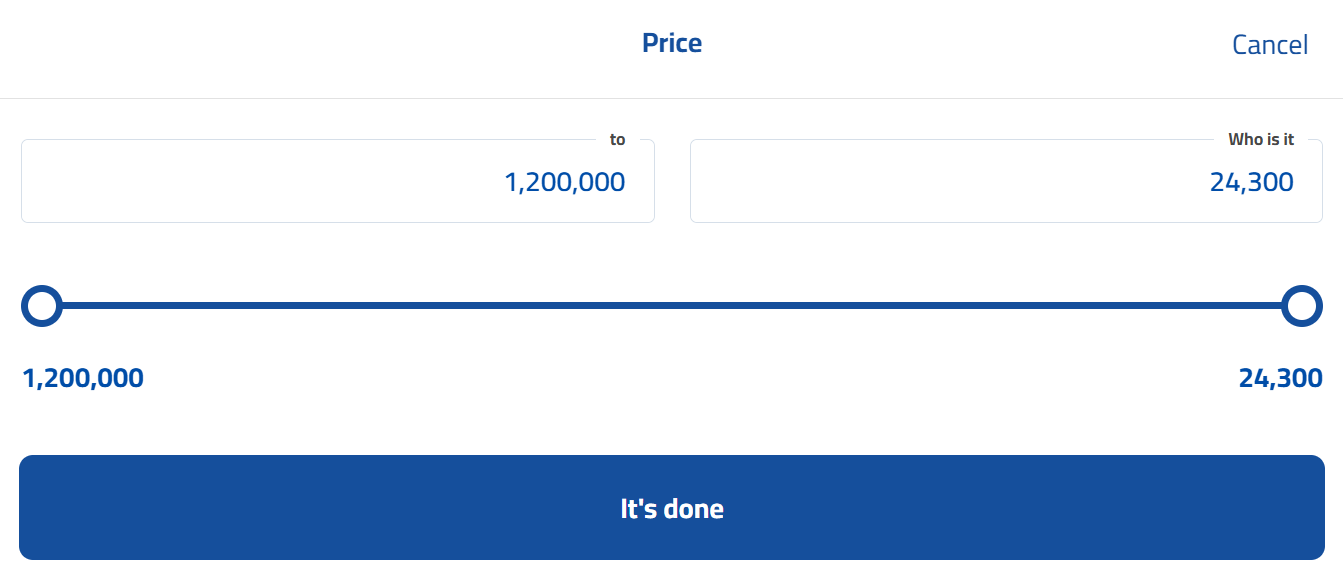

Text(0.5, 1.0, 'Price Spread')

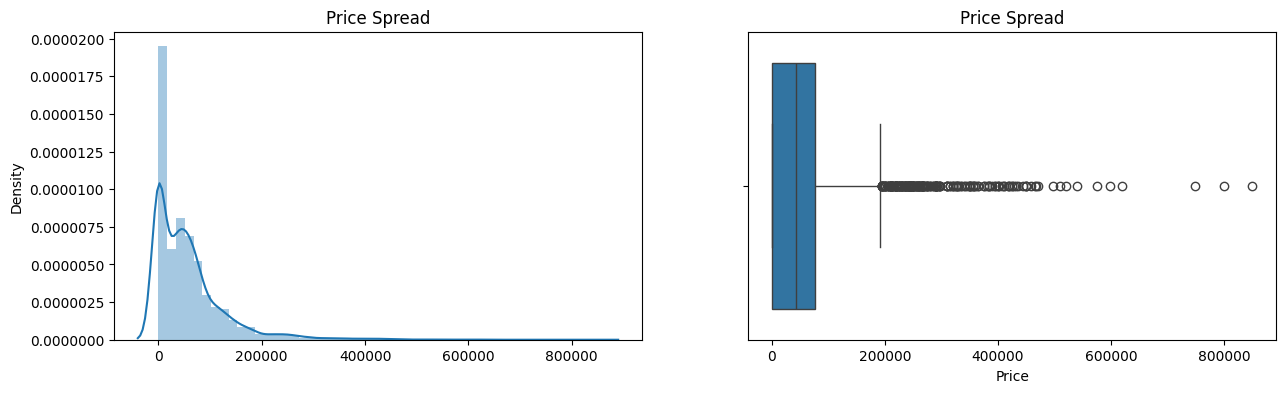

In [223]:
# Price skewness and distribution
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Price Spread')
sns.distplot(x=df['Price'])
plt.ticklabel_format(useOffset=False, style='plain', axis=('y'))

plt.subplot(1,2,2)
sns.boxplot(df,x='Price')
plt.title('Price Spread')

extreme outliers over than 700000

In [224]:
df['Price'].describe()

count      4897.000000
mean      57891.095160
std       72701.779162
min           0.000000
25%           0.000000
50%       42000.000000
75%       77000.000000
max      850000.000000
Name: Price, dtype: float64

In [225]:
# # check data Price equal to zero
# df[df['Price'] == 0].shape[0]

In [226]:
# Drop data Price equal to zero
df = df[df['Price'] != 0]
df['Price'].describe()

count      3431.000000
mean      82626.841446
std       74163.248886
min           1.000000
25%       39000.000000
50%       62000.000000
75%      100000.000000
max      850000.000000
Name: Price, dtype: float64

In [227]:
# check data Price equal to one
df[df['Price'] == 1].shape[0]

1

In [228]:
# Drop data Price equal to one
df = df[df['Price'] != 1]

In [229]:
df['Price'].describe()

count      3430.000000
mean      82650.930612
std       74160.636173
min         500.000000
25%       39000.000000
50%       62000.000000
75%      100000.000000
max      850000.000000
Name: Price, dtype: float64

- Set a minimum price of >= 5000 (<= 5000 may look suspicious)
- Since the average salary in Saudi Arabia ...
- Per capita income in Saudi Arabia ...
- Set a maximum price of <= 700000, as it represents extreme outliers

In [230]:
df = df[(df['Price'] >= 5000) & (df['Price'] <= 700000)]

#### 4. Engine Size

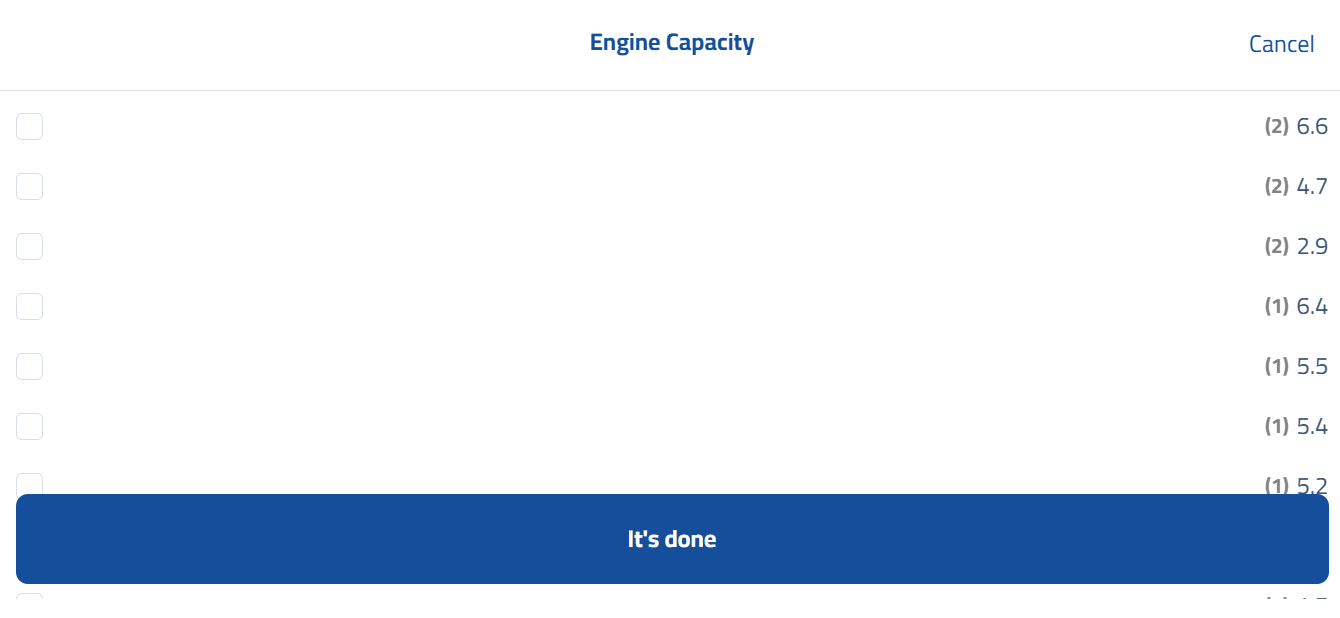

**Engine Size > 7**
- Considerations for engine size > higher > emissions > damaging the environment -> not compliant with government regulations
- Fuel-inefficient
- Increased emissions
- Safety issues

Text(0.5, 1.0, 'Engine Size Spread')

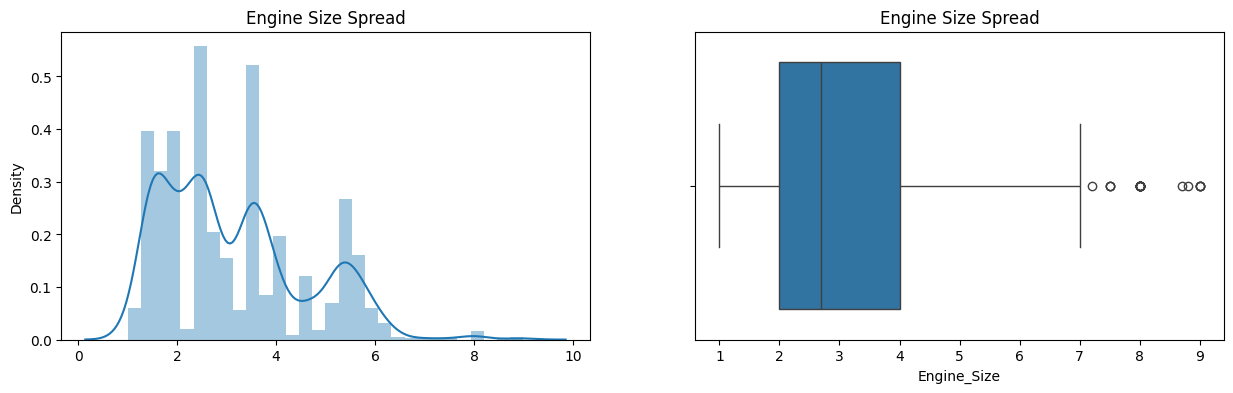

In [231]:
# Engine Size skewness and distribution
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Engine Size Spread')
sns.distplot(x=df['Engine_Size'])
plt.ticklabel_format(useOffset=False, style='plain', axis=('y'))

plt.subplot(1,2,2)
sns.boxplot(df,x='Engine_Size')
plt.title('Engine Size Spread')

In [232]:
df['Engine_Size'].describe()

count    3364.000000
mean        3.129608
std         1.443067
min         1.000000
25%         2.000000
50%         2.700000
75%         4.000000
max         9.000000
Name: Engine_Size, dtype: float64

In [233]:
df = df[(df['Engine_Size'] <= 7)]

In [234]:
df.describe()

,Year,Engine_Size,Mileage,Price
count,3339.000000,3339.000000,3339.000000,3339.000000
mean,2015.821503,3.092183,107095.814915,83247.682839
std,3.276805,1.381191,78254.589139,70690.169111
min,2004.000000,1.000000,100.000000,5000.000000
25%,2014.000000,2.000000,45000.000000,40000.000000
50%,2016.000000,2.700000,96000.000000,62500.000000
75%,2018.000000,4.000000,157000.000000,100000.000000
max,2021.000000,7.000000,300000.000000,620000.000000


### 4.1.3. Outliers after

In [235]:
# def calculate_outliers(data,column):
#     Q1 = data[column].quantile(.25)
#     Q3 = data[column].quantile(.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - (1.5 * IQR)
#     upper_bound = Q3 + (1.5 * IQR)
#     outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
#     return outliers, lower_bound, upper_bound

outlier_data_after = []

for i in numerical:
    outliers_result, lower_bound, upper_bound = calculate_outliers(df,i)
    total_outlier = len(outliers_result)
    outlier_percentage = round(total_outlier/len(df[i])*100,2)
    outlier_data_after.append([i,total_outlier,outlier_percentage,lower_bound,upper_bound])

outlier_df_after = pd.DataFrame(outlier_data_after,columns=['Column','Total outlier','Percentage','Lower bound','Upper bound'])
outlier_df_after

,Column,Total outlier,Percentage,Lower bound,Upper bound
0,Year,103,3.08,2008.0,2024.0
1,Engine_Size,0,0.00,-1.0,7.0
2,Mileage,0,0.00,-123000.0,325000.0
3,Price,225,6.74,-50000.0,190000.0


### 4.1.4. Categorical data

- Since the origin feature represents the origin of the used car, it is an important consideration when selling used cars.
- The location where the used car was driven affects its price, such as the terrain and weather conditions at the origin of the used car.
- We cannot search for and replace this data because it is real data, reflecting actual conditions in the field.
- Similarly, we cannot replace this data by taking information from other data.
- The best option is to drop it because it will affect modeling, especially during the encoding process. It will have zero impact because the data is unclear or unknown.
- Although this will impose limitations on our model and reduce the model's generalization to unseen data.

In [236]:
df = df[df['Origin'] != 'Unknown']

In [237]:
df.drop(columns=['Negotiable'],inplace=True)

In [238]:
df.describe(include='object').T

,count,unique,top,freq
Type,3326,305,Accent,144
Region,3326,27,Riyadh,1444
Make,3326,55,Toyota,721
Gear_Type,3326,2,Automatic,3045
Origin,3326,3,Saudi,2524
Options,3326,3,Full,1281


## 4.2. Add Feature

In [239]:
# plot Car_Type
# Interpretation

In [240]:
df.Type.unique()

array(['Range Rover', 'Optima', 'CX3', 'Cayenne S', 'Sonata', 'Avalon',
       'C300', 'Land Cruiser', 'LS', 'FJ', 'Tucson', 'Sunny', 'Pajero',
       'Azera', 'Focus', '5', 'Spark', 'Accent', 'ML', 'Corolla', 'Tahoe',
       'A', 'Altima', 'Expedition', 'Liberty', 'X', 'Land Cruiser Pickup',
       'Malibu', 'The 5', 'Patrol', 'Grand Cherokee', 'SL', 'Previa',
       'MKZ', 'Datsun', 'Hilux', 'Yukon', 'GLC', 'Edge', '6', 'Innova',
       'Navara', 'Senta fe', 'G80', 'Carnival', 'Camaro', 'Taurus',
       'Camry', 'Elantra', 'Flex', 'S', 'Cerato', 'Murano',
       'Land Cruiser 70', '3', 'Pick up', 'Charger', 'H6', 'Hiace',
       'Fusion', 'Aveo', 'CX9', 'Yaris', 'Sierra', 'CT-S', 'Sylvian Bus',
       'ES', 'Navigator', 'Opirus', 'The 7', 'Creta', 'CS35', 'The 3',
       'GLE', 'Sedona', 'Victoria', 'Prestige', 'CLA', 'Vanquish',
       'Safrane', 'Cores', 'Cadenza', 'Silverado', 'Rio', 'Maxima',
       'X-Trail', 'Cruze', 'C', 'Seven', 'Prado', 'LX', 'Impala', 'QX',
       'Blazer',

In [241]:
# Define the mapping from existing types to new car types
type_mapping = {
    'Yukon': 'SUV',
    'Range Rover': 'SUV',
    'Optima': 'Sedan',
    'CX3': 'Crossover',
    'Cayenne S': 'SUV',
    'Sonata': 'Sedan',
    'Avalon': 'Sedan',
    'C300': 'Sedan',
    'Land Cruiser': 'SUV',
    'LS': 'Sedan',
    'FJ': 'SUV',
    'Tucson': 'SUV',
    'Sunny': 'Sedan',
    'Pajero': 'SUV',
    'Azera': 'Sedan',
    'Focus': 'Hatchback',
    '5': 'Sedan',
    'Spark': 'Hatchback',
    'Accent': 'Sedan',
    'ML': 'SUV',
    'Corolla': 'Sedan',
    'Tahoe': 'SUV',
    'A': 'Hatchback',
    'Altima': 'Sedan',
    'Expedition': 'SUV',
    'Liberty': 'SUV',
    'X': 'Sedan',
    'Land Cruiser Pickup': 'Pickup',
    'Malibu': 'Sedan',
    'The 5': 'Sedan',
    'Patrol': 'SUV',
    'Grand Cherokee': 'SUV',
    'Camry': 'Sedan',
    'SL': 'Convertible',
    'Previa': 'Minivan',
    'MKZ': 'Sedan',
    'Datsun': 'Sedan',
    'Hilux': 'Pickup',
    'GLC': 'SUV',
    'Edge': 'SUV',
    '6': 'Sedan',
    'Innova': 'MPV',
    'Navara': 'Pickup',
    'Senta fe': 'SUV',
    'G80': 'Sedan',
    'Carnival': 'Minivan',
    'Suburban': 'SUV',
    'Camaro': 'Sports Car',
    'Taurus': 'Sedan',
    'Elantra': 'Sedan',
    'Flex': 'SUV',
    'S': 'Sedan',
    'Cerato': 'Sedan',
    'Murano': 'SUV',
    'Land Cruiser 70': 'SUV',
    '3': 'Sedan',
    'Pick up': 'Pickup',
    'Charger': 'Sedan',
    'H6': 'SUV',
    'Hiace': 'Van',
    'Fusion': 'Sedan',
    'Aveo': 'Sedan',
    'CX9': 'SUV',
    'Yaris': 'Hatchback',
    'Sierra': 'Pickup',
    'CT-S': 'Sedan',
    'Sylvian Bus': 'Bus',
    'ES': 'Sedan',
    'Navigator': 'SUV',
    'Opirus': 'Sedan',
    'The 7': 'Sedan',
    'Creta': 'SUV',
    'CS35': 'SUV',
    'The 3': 'Sedan',
    'GLE': 'SUV',
    'Sedona': 'Minivan',
    'Victoria': 'Sedan',
    'Prestige': 'Sedan',
    'CLA': 'Sedan',
    'Vanquish': 'Sports Car',
    'Safrane': 'Sedan',
    'Cores': 'Sedan',
    'Cadenza': 'Sedan',
    "D'max": 'Pickup',
    'Silverado': 'Pickup',
    'Rio': 'Hatchback',
    'Maxima': 'Sedan',
    'X-Trail': 'SUV',
    'Cruze': 'Sedan',
    'C': 'Sedan',
    'Seven': 'Sedan',
    'Prado': 'SUV',
    'Grand Marquis': 'Sedan',
    'LX': 'SUV',
    'Impala': 'Sedan',
    'QX': 'SUV',
    'Blazer': 'SUV',
    'H1': 'Van',
    'Rav4': 'SUV',
    'The M': 'Sedan',
    'Accord': 'Sedan',
    'Genesis': 'Sedan',
    'Traverse': 'SUV',
    'Furniture': 'Other',
    'SEL': 'Sedan',
    'Civic': 'Sedan',
    'Echo Sport': 'SUV',
    'Challenger': 'Sports Car',
    'CL': 'Convertible',
    'Wrangler': 'SUV',
    'A6': 'Sedan',
    'Dokker': 'Van',
    'CX5': 'SUV',
    'Mohave': 'SUV',
    'Ghost': 'Sedan',
    'Caprice': 'Sedan',
    'Durango': 'SUV',
    'Rush': 'SUV',
    'Sentra': 'Sedan',
    'Cherokee': 'SUV',
    'Veloster': 'Hatchback',
    'E': 'Sedan',
    'G': 'Sedan',
    'IS': 'Sedan',
    'Fluence': 'Sedan',
    'Vego': 'Pickup',
    'Other': 'Other',
    'Marquis': 'Sedan',
    'Q': 'Sedan',
    'F3': 'Sedan',
    'Kona': 'SUV',
    'Explorer': 'SUV',
    'UX': 'SUV',
    'Beetle': 'Hatchback',
    'F150': 'Pickup',
    'Lancer': 'Sedan',
    'Van R': 'Van',
    'Mustang': 'Sports Car',
    'CS35 Plus': 'SUV',
    'DB9': 'Sports Car',
    'Sorento': 'SUV',
    'APV': 'Van',
    'Viano': 'Van',
    'EC7': 'Sedan',
    'Safari': 'SUV',
    'Cadillac': 'Sedan',
    'Duster': 'SUV',
    'RX': 'SUV',
    'Platinum': 'Sedan',
    'Carenz': 'MPV',
    'Avanza': 'MPV',
    'Emgrand': 'Sedan',
    'D-MAX': 'Pickup',
    'Dyna': 'Truck',
    'Pathfinder': 'SUV',
    'Z': 'Sedan',
    'Coupe S': 'Convertible',
    'Odyssey': 'Minivan',
    'Panamera': 'Sedan',
    'Ciocca': 'Sedan',
    'Juke': 'SUV',
    'Sportage': 'SUV',
    'C200': 'Sedan',
    'Attrage': 'Sedan',
    'GS': 'Sedan',
    'X-Terra': 'SUV',
    'Picanto': 'Hatchback',
    'CT5': 'Sedan',
    'KICKS': 'SUV',
    'Gran Max': 'Van',
    'Cayman': 'Convertible',
    'A8': 'Sedan',
    'Levante': 'SUV',
    'Optra': 'Sedan',
    'Montero': 'SUV',
    '300': 'Sedan',
    'A3': 'Hatchback',
    'Touareg': 'SUV',
    'Passat': 'Sedan',
    'Delta': 'Sedan',
    'VTC': 'Sedan',
    'Acadia': 'SUV',
    'H3': 'SUV',
    'GS3': 'SUV',
    'Coupe': 'Convertible',
    'Cayenne Turbo': 'SUV',
    'Colorado': 'Pickup',
    'Vitara': 'SUV',
    'Kaptiva': 'SUV',
    'Nativa': 'SUV',
    'CLS': 'Sedan',
    'LF X60': 'SUV',
    'Koleos': 'SUV',
    'Abeka': 'Sedan',
    'Flying Spur': 'Sedan',
    'Pilot': 'SUV',
    'L200': 'Pickup',
    'Ranger': 'Pickup',
    'Escalade': 'SUV',
    'A7': 'Sedan',
    'Quattroporte': 'Sedan',
    'Compass': 'SUV',
    'Bus Urvan': 'Bus',
    'Macan': 'SUV',
    'Azkarra': 'SUV',
    'GL': 'SUV',
    'City': 'Sedan',
    'Symbol': 'Sedan',
    'Ertiga': 'MPV',
    'RX5': 'SUV',
    'Envoy': 'SUV',
    'CT6': 'Sedan',
    'Fleetwood': 'Sedan',
    'Tiggo': 'SUV',
    'Q5': 'SUV',
    'A4': 'Sedan',
    'XJ': 'Sedan',
    'H2': 'SUV',
    'HS': 'SUV',
    'Seltos': 'SUV',
    'RX8': 'SUV',
    '301': 'Sedan',
    'EC8': 'Sedan',
    '3008': 'SUV',
    'Suvana': 'SUV',
    'Prius': 'Hybrid',
    'Cayenne': 'SUV',
    'Eado': 'Sedan',
    'Royal': 'Sedan',
    'NX': 'SUV',
    'Copper': 'Sedan',
    'CS75': 'SUV',
    'F-Pace': 'SUV',
    'Coolray': 'SUV',
    'CS85': 'SUV',
    'Jimny': 'SUV',
    'GC7': 'Sedan',
    '360': 'Sedan',
    'A5': 'Sedan',
    'S300': 'Sedan',
    'Superb': 'Sedan',
    'Ram': 'Pickup',
    'Terrain': 'SUV',
    '500': 'Hatchback',
    'Armada': 'SUV',
    'Logan': 'Sedan',
    '5008': 'SUV',
    'Tiguan': 'SUV',
    'Golf': 'Hatchback',
    'CS95': 'SUV',
    'S5': 'Sedan',
    '911': 'Sports Car',
    'Camargue': 'Convertible',
    'Defender': 'SUV',
    'Daily': 'Truck',
    'Nitro': 'SUV',
    'Mini Van': 'Minivan',
    'Pegas': 'Sedan',
    'Grand Vitara': 'SUV',
    'FX': 'SUV',
    'L300': 'Van',
    'Coaster': 'Bus',
    'Discovery': 'SUV',
    'Cressida': 'Sedan',
    'Z370': 'Sedan',
    'Bus County': 'Bus',
    'Stinger': 'Sedan',
    'SRT': 'SUV',
    'K5': 'Sedan',
    'CT4': 'Sedan',
    'F Type': 'Sports Car',
    'CC': 'Sedan',
    'ASX': 'SUV',
    'Carens': 'MPV',
    'XT5': 'SUV',
    'Tuscani': 'Sports Car',
    '4Runner': 'SUV',
    'ATS': 'Sedan',
    'CRV': 'SUV',
    'The 4': 'Sedan',
    'HRV': 'SUV',
    'X7': 'SUV',
    'GX': 'SUV',
    'X40': 'SUV',
    'Q7': 'SUV',
    'ZS': 'SUV',
    'G70': 'Sedan',
    'Megane': 'Sedan',
    'Power': 'Truck',
    'B50': 'Sedan',
    'Town Car': 'Sedan',
    'Van': 'Van',
    '2': 'Hatchback',
    'i40': 'Sedan',
    'XF': 'Sedan',
    'RC': 'Sedan',
    'Doblo': 'Van',
    'MKX': 'SUV',
    'The 6': 'Sedan',
    'Jetta': 'Sedan',
    'Soul': 'Hatchback',
    'Dzire': 'Sedan',
    'Avante': 'Sedan',
    'Z350': 'Sedan',
    'CX7': 'SUV',
    'Countryman': 'SUV',
    'GTB 599 Fiorano': 'Sports Car',
    'Prestige Plus': 'Sedan',
    'MKS': 'Sedan',
    'Milan': 'Sedan',
    'Savana': 'Van',
    'S8': 'Sedan'
}

# Create the new 'Car Type' feature
df['Car_Type'] = df['Type'].map(type_mapping)

# Re-order columns to place 'Car Type' at index 1 (after 'Index')
columns = df.columns.tolist()
columns.insert(1, columns.pop(columns.index('Car_Type')))
df = df[columns]

## 4.3 Clean dataset

In [242]:
df = df.reset_index(drop=True)
df

,Type,Car_Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Range Rover,SUV,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
1,Optima,Sedan,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
2,CX3,Crossover,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000
3,Cayenne S,SUV,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000
4,Sonata,Sedan,Riyadh,Hyundai,Automatic,Saudi,Full,2016,2.4,155,48000
...,...,...,...,...,...,...,...,...,...,...,...
3321,CX9,SUV,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,132000
3322,Suburban,SUV,Riyadh,GMC,Automatic,Saudi,Full,2006,5.3,86000,50000
3323,X-Trail,SUV,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,68000
3324,Yukon,SUV,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,145000


# 5. Feature Selection

## 5.1. Correlation

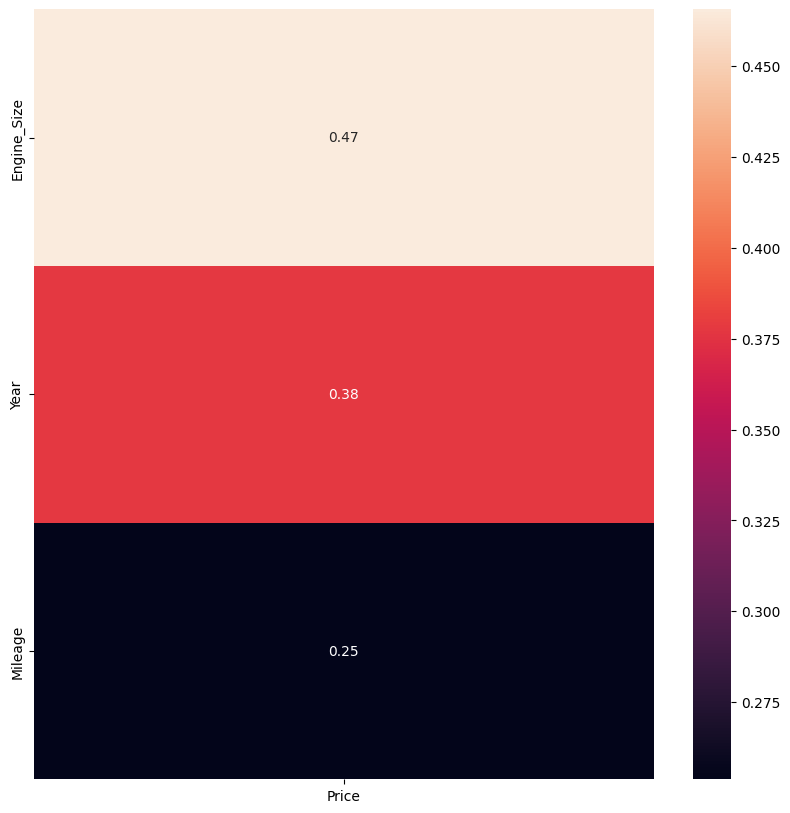

In [243]:
# spearman
numeric_cols = df.select_dtypes(include=[np.number])
corr_matrix = abs(numeric_cols.corr('spearman'))

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix.sort_values('Price', ascending=False)[['Price']][1:], annot=True)
plt.show()

Engine size : The strongest positive correlation with price (0.47). This means that as engine size increases, the price of the car tends to increase as well.

Year : Moderate positive correlation with price (0.38). This means that newer cars (higher year) tend to be more expensive than older cars.

Mileage : The weakest positive correlation with price (0.25). This means that there is a weak positive relationship between mileage and price. In other words, cars with lower mileage might be slightly more expensive, but the effect is not very strong.

# 6. Feature Engineering

In [244]:
# encoding
one_hot = OneHotEncoder()
binary = ce.BinaryEncoder()

# scaler
robust = RobustScaler()
standard = StandardScaler()

In [245]:
# define feature
X = df.drop(['Price'],axis=1)
y = df['Price']

# splitting
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

print(X_train.shape,y_train.shape)
print(X_test.shape, y_test.shape)

(2328, 10) (2328,)
(998, 10) (998,)


In [246]:
# algorithm chain
preprocessing = ColumnTransformer([
    ('One Hot', one_hot, ['Gear_Type', 'Origin', 'Options']),
    ('Binary', binary, ['Car_Type','Type', 'Region', 'Make']),
    ('Scaler', robust, ['Year','Engine_Size', 'Mileage'])
])
preprocessing

ColumnTransformer(transformers=[('One Hot', OneHotEncoder(),
                                 ['Gear_Type', 'Origin', 'Options']),
                                ('Binary', BinaryEncoder(),
                                 ['Car_Type', 'Type', 'Region', 'Make']),
                                ('Scaler', RobustScaler(),
                                 ['Year', 'Engine_Size', 'Mileage'])])

In [247]:
preprocessing_X_train = preprocessing.fit_transform(X_train)
# preprocessing_test = preprocessing.transform(X_test)

prep_cols = (
    preprocessing.named_transformers_['One Hot'].get_feature_names_out(['Gear_Type', 'Origin', 'Options']).tolist() +
    preprocessing.named_transformers_['Binary'].get_feature_names_out(['Car_Type','Type', 'Region', 'Make']).tolist() +
    preprocessing.named_transformers_['Scaler'].get_feature_names_out(['Year', 'Engine_Size', 'Mileage']).tolist() # Include the scaled columns
)
prep_data_X_train = pd.DataFrame(preprocessing_X_train, columns=prep_cols)
prep_data_X_train

,Gear_Type_Automatic,Gear_Type_Manual,Origin_Gulf Arabic,Origin_Other,Origin_Saudi,Options_Full,Options_Semi Full,Options_Standard,Car_Type_0,Car_Type_1,...,Region_4,Make_0,Make_1,Make_2,Make_3,Make_4,Make_5,Year,Engine_Size,Mileage
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.50,-0.657534,-0.159292
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.50,0.000000,-0.710619
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,-0.493151,-0.483009
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.00,-0.493151,0.504425
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.50,-0.712329,-0.061947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2323,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-2.25,1.041096,1.442478
2324,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.25,1.808219,0.654867
2325,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.00,-0.657534,-0.827434
2326,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,-0.164384,0.504425


In [248]:
features = list(preprocessing.get_feature_names_out())

list_features = []

for feature in features:
    list_features.append('_'.join(feature.split('_')[2:]))

list_features

['Gear_Type_Automatic',
 'Gear_Type_Manual',
 'Origin_Gulf Arabic',
 'Origin_Other',
 'Origin_Saudi',
 'Options_Full',
 'Options_Semi Full',
 'Options_Standard',
 'Car_Type_0',
 'Car_Type_1',
 'Car_Type_2',
 'Car_Type_3',
 'Type_0',
 'Type_1',
 'Type_2',
 'Type_3',
 'Type_4',
 'Type_5',
 'Type_6',
 'Type_7',
 'Type_8',
 'Region_0',
 'Region_1',
 'Region_2',
 'Region_3',
 'Region_4',
 'Make_0',
 'Make_1',
 'Make_2',
 'Make_3',
 'Make_4',
 'Make_5',
 'Year',
 'Engine_Size',
 'Mileage']

# 7. Modeling

## 7.1. Model benchmark

In [249]:
# ML Algorithms
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=42)
r = Ridge(random_state=42)
ls = Lasso(random_state=42)
en = ElasticNet(random_state=42)

# Ensemble
rf = RandomForestRegressor(random_state=42)
ada = AdaBoostRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

models = [lr,knn,dt,r,ls,rf,xgb,en,ada,gb]
models_name = ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor',
               'Ridge', 'Lasso', 'RandomForest Regressor', 'XGBoost Regressor',
               'Elastic','Ada Boost','Gradient']

In [250]:
# Evaluation metrics
rmse = []
mean_mape = []
std_mape = []
mean_mae = []
std_mae = []
r2 = []
adjusted_r2 = []
runtimes = []

# Evaluation
for model in models:
    crossval = KFold(n_splits=5, shuffle=True, random_state=42)
    estimator = Pipeline([
        ('Preprocess', preprocessing),
        ('Model', model)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_squared_error',
        error_score='raise'
    )
    model_cv_rmse = np.sqrt(-model_cv_rmse)
    rmse.append(model_cv_rmse.mean())

    # MAE
    model_cv_mae = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_error',
        error_score='raise'
    )
    mean_mae.append(-model_cv_mae.mean())
    std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_percentage_error',
        error_score='raise'
    )
    mean_mape.append(-model_cv_mape.mean())
    std_mape.append(model_cv_mape.std())

    # R2
    model_cv_r2 = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='r2',
        error_score='raise'
    )
    mean_r2 = model_cv_r2.mean()
    r2.append(mean_r2)

    # Adjusted R2
    n = len(X_train)
    p = X_train.shape[1]

    adj_r2 = 1 - (1 - mean_r2) * (n - 1) / (n - p - 1)
    adjusted_r2.append(adj_r2)

    # Measure runtime
    start_time = time.time()
    end_time = time.time()
    runtime = end_time - start_time
    runtimes.append(runtime)

In [251]:
print('Model Benchmark')
model_benchmark = pd.DataFrame({
    'Model': models_name,
    'MAPE' : mean_mape,
    'Std MAPE' : std_mape,
    'MAE' : mean_mae,
    'Std MAE' : std_mae,
    'RMSE' : rmse,
    'R2 Score' : r2,
    'Adjusted R2': adjusted_r2,
    'Runtime (s)': runtimes
})
model_benchmark.sort_values(by='R2 Score',ascending=False)

Model Benchmark


,Model,MAPE,Std MAPE,MAE,Std MAE,RMSE,R2 Score,Adjusted R2,Runtime (s)
6,XGBoost Regressor,0.263135,0.021593,18336.235191,918.660652,33539.888509,0.778638,0.777683,0.0
5,RandomForest Regressor,0.279991,0.028296,19116.875005,966.098314,35222.421937,0.755385,0.754329,0.0
1,KNN Regressor,0.350133,0.034331,21048.665352,1026.590993,36450.663148,0.737618,0.736486,0.0
9,Gradient,0.310859,0.026422,21268.289137,1279.266044,36625.607911,0.734156,0.733009,0.0
3,Ridge,0.595363,0.058405,32726.729590,1622.964984,49814.791211,0.511415,0.509306,0.0
4,Lasso,0.595995,0.058406,32743.926934,1624.389201,49817.987617,0.511350,0.509241,0.0
0,Linear Regression,0.606549,0.071613,33138.097054,1514.130179,50144.651555,0.504385,0.502246,0.0
2,DecisionTree Regressor,0.363087,0.029915,26035.532904,1598.826460,51366.921446,0.478618,0.476368,0.0
8,Ada Boost,0.977977,0.064803,45226.359540,2859.252709,54407.523558,0.416578,0.414060,0.0
7,Elastic,0.562978,0.041363,34120.664175,1343.608315,55680.039925,0.390011,0.387379,0.0


In [252]:
model_index = 6
train_xgb = pd.DataFrame({
    'MAPE': [mean_mape[model_index]],
    'RMSE': [rmse[model_index]],
    'R2 Score': [r2[model_index]],
    'Adjusted R2': [adjusted_r2[model_index]],
    'Runtime(s)': [runtimes[model_index]]
},
    index=['Train XGB']
)
train_xgb

,MAPE,RMSE,R2 Score,Adjusted R2,Runtime(s)
Train XGB,0.263135,33539.888509,0.778638,0.777683,0.0


## 7.2. Best 3 model

In [253]:
# Best models
best_models = [knn, xgb, rf]
# best_models_name = ['KNN Regressor', 'XGBoost Regressor', 'RandomForest Regressor']

# Evaluation metrics
test_mape = []
test_r2 = []
test_adj_r2 = []
test_rmse = []
test_runtimes = []

# Evaluation
for model in best_models:
    crossval = KFold(n_splits=5, shuffle=True, random_state=42)
    estimator = Pipeline([
        ('Preprocess', preprocessing),
        ('Model', model)
    ])

    # Fit the model
    estimator.fit(X_train, y_train)

    # Predict
    y_pred = estimator.predict(X_test)

    # MAPE
    pred_mape = mean_absolute_percentage_error(y_test, y_pred)
    test_mape.append(pred_mape)

    # RMSE
    pred_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    test_rmse.append(pred_rmse)

    # R2
    pred_r2 = r2_score(y_test, y_pred)
    test_r2.append(pred_r2)

    # Adjusted R2
    n_test = len(X_test)
    p_test = X_test.shape[1]
    pred_adj_r2 = 1 - (1 - pred_r2) * (n_test - 1) / (n_test - p_test - 1)
    test_adj_r2.append(pred_adj_r2)

    # Measure runtime
    start_time = time.time()
    end_time = time.time()
    pred_run = end_time - start_time
    test_runtimes.append(pred_run)


In [254]:
print('Predict with best 3 model')
pred_model = pd.DataFrame({
    'MAPE': test_mape,
    'RMSE': test_rmse,
    'R2 Score': test_r2,
    'Adjusted R2': test_adj_r2,
    'Runtime(s)': test_runtimes},
    index=['Pred KNN','Pred XGB', 'Pred RF'])

# Sort the evaluation DataFrame by Mean MAPE
pred_model.sort_values(by='MAPE')

Predict with best 3 model


,MAPE,RMSE,R2 Score,Adjusted R2,Runtime(s)
Pred XGB,0.226906,32009.452763,0.786902,0.784743,0.0
Pred RF,0.253515,34034.036186,0.759092,0.756652,0.0
Pred KNN,0.305259,35777.323526,0.733781,0.731084,0.0


In [255]:
pred_xgb = pred_model.loc[['Pred XGB']]
pred_xgb

,MAPE,RMSE,R2 Score,Adjusted R2,Runtime(s)
Pred XGB,0.226906,32009.452763,0.786902,0.784743,0.0


# 8. Tuning

In [256]:
# CV - KFold
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Estimator
xgb_pipe_tuning = Pipeline([
    ('Preprocessing', preprocessing),
    ('model', xgb)])

## 8.1. Randomized Search CV

In [257]:
# Set parameter
# param_rand = {
#     'model__n_estimators': [100, 200, 300],
#     'model__learning_rate': [0.01, 0.1, 0.2],
#     'model__max_depth': [3, 5, 7],
#     'model__min_child_weight': [1, 3, 5],
#     'model__gamma': [0, 0.1, 0.2],
#     'model__subsample': [0.8, 0.9, 1.0],
#     'model__colsample_bytree': [0.8, 0.9, 1.0],
#     'model__reg_alpha': [0, 0.01, 0.1],
#     'model__reg_lambda': [1, 1.5, 2]}

# # Define random search
# random_xgb = RandomizedSearchCV(
#     xgb_pipe_tuning,
#     param_distributions = param_rand,
#     n_iter = 300,
#     cv = cv,
#     scoring = 'neg_mean_absolute_percentage_error',
#     n_jobs = -1,
#     verbose = 1,
#     random_state = 42
# )
# random_xgb

In [258]:
# random_xgb.fit(X_train,y_train)

In [259]:
# print('XGBoost Randomized Search CV')
# print('Best_score:', random_xgb.best_score_)
# print('Best_params:', random_xgb.best_params_)

In [260]:
# xgb_tuned = random_xgb.best_estimator_

## 8.2. Grid Search CV

In [261]:
# param_grid = {
#     'model__subsample': [0.85, 0.9, 0.95],
#     'model__reg_lambda': [0.0005, 0.001, 0.005],
#     'model__reg_alpha': [0.005, 0.01, 0.05],
#     'model__n_estimators': [400],
#     'model__min_child_weight': [4, 5, 6],
#     'model__max_depth': [6, 7, 8],
#     'model__learning_rate': [0.03, 0.042, 0.05],
#     'model__gamma': [0.2, 0.3, 0.4],
#     'model__colsample_bytree': [0.75, 0.8, 0.85]
# }
# result
# XGBoost Grid Search CV
# Best_score: -0.22948686589730644
# Best_params: {'model__colsample_bytree': 0.8,
#               'model__gamma': 0.2,
#               'model__learning_rate': 0.05,
#               'model__max_depth': 6,
#               'model__min_child_weight': 4,
#               'model__n_estimators': 400,
#               'model__reg_alpha': 0.05,
#               'model__reg_lambda': 0.001,
#               'model__subsample': 0.9}

# ----------------------------------------------------------------------------------------------------------------------------------------------------------------
# param_grid = {
#     'model__n_estimators': [50, 100, 200],
#     'model__max_depth': [3, 5, 7],
#     'model__learning_rate': [0.01, 0.05, 0.1],
#     'model__subsample': [0.7, 0.8, 0.9],
#     'model__colsample_bytree': [0.7, 0.8, 0.9],
#     'model__gamma': [0, 0.1, 0.3],
#     'model__min_child_weight': [1, 3, 5]
# }

# # result :
# # runtime : 31m
# XGBoost Grid Search CV
# Best_score: -0.23212646047400268
# Best_params: {'model__colsample_bytree': 0.8,
#               'model__gamma': 0,
#               'model__learning_rate': 0.05,
#               'model__max_depth': 7,
#               'model__min_child_weight': 5,
#               'model__n_estimators': 200,
#               'model__subsample': 0.9}
# ----------------------------------------------------------------------------------------------------------------------------------------------------------------

# # define grid search
# grid_xgb = GridSearchCV(
#     estimator= xgb_pipe_tuning,
#     param_grid= param_grid,
#     cv= 5,
#     scoring =  ['neg_mean_absolute_percentage_error'],
#     n_jobs= -1,
#     verbose = 1
# )

# grid_xgb = GridSearchCV(
#     estimator= xgb_pipe_tuning,
#     param_grid= param_grid,
#     cv= cv,
#     scoring = 'neg_mean_absolute_percentage_error',
#     n_jobs= -1,
#     verbose = 1
# )

# grid_xgb

In [262]:
# grid_xgb.fit(X_train,y_train)

In [263]:
# print('XGBoost Grid Search CV')
# print('Best_score:', grid_xgb.best_score_)
# print('Best_params:', grid_xgb.best_params_)

In [264]:
# xgb_tuned = grid_xgb.best_estimator_

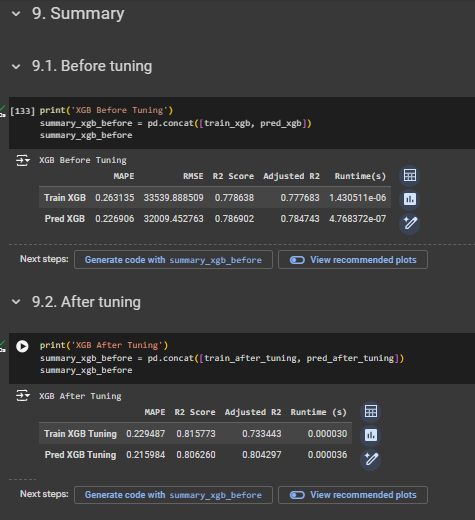

## 8.3. Best parameter

In [265]:
best_param_rand = {'subsample': 0.9,
                    'reg_lambda': 0.001,
                    'reg_alpha': 0.01,
                    'n_estimators': 400,
                    'min_child_weight': 5,
                    'max_depth': 7,
                    'learning_rate': 0.042222222222222223,
                    'gamma': 0.3,
                    'colsample_bytree': 0.8}

xgb = XGBRegressor(random_state=42)
xgb.set_params(**best_param_rand)

xgb_tuned = Pipeline([
    ('Preprocessing', preprocessing),
    ('Model', xgb)
])

## 8.4. Model in train after tuning

In [266]:
# Evaluation metrics
tuned_mape_train = []
tuned_r2_train = []
tuned_adj_r2_train = []
tuned_runtimes_train = []

# MAPE
model_tuned_mape = cross_val_score(
    xgb_tuned,
    X_train,
    y_train,
    cv=cv,
    scoring='neg_mean_absolute_percentage_error',
    error_score='raise'
    )
tuned_mape_train.append(-model_tuned_mape.mean())

# R2
model_tuned_r2 = cross_val_score(
    xgb_tuned,
    X_train,
    y_train,
    cv=cv,
    scoring='r2',
    error_score='raise'
    )
tuned_r2_train.append(model_tuned_r2.mean())

# Adjusted R2
n_tr = len(X_train)
p_tr = X_train.shape[1]
adj_r2 = 1 - (1 - mean_r2) * (n_tr - 1) / (n_tr - p_tr - 1)
tuned_adj_r2_train.append(adj_r2)

# Measure runtime
start_time_tr = time.time()
end_time_tr = time.time()
runtime_tr = end_time_tr - start_time_tr
tuned_runtimes_train.append(runtime_tr)

In [267]:
print('Model in train after tuning')
train_after_tuning = pd.DataFrame({
    'MAPE': tuned_mape_train,
    'R2 Score': tuned_r2_train,
    'Adjusted R2': tuned_adj_r2_train,
    'Runtime (s)': tuned_runtimes_train},
    index=['Train XGB Tuning']
    )
train_after_tuning.T

Model in train after tuning


,Train XGB Tuning
MAPE,0.236976
R2 Score,0.813931
Adjusted R2,0.733009
Runtime (s),0.000000


## 8.5. Model in test after tuning

In [268]:
# Evaluation metrics
test_tuned_mape = []
test_tuned_r2 = []
test_tuned_ajd_r2 = []
test_tuned_runtimes = []

# Fit the model
xgb_tuned.fit(X_train, y_train)

# Predict
y_pred_tuned = xgb_tuned.predict(X_test)

In [269]:
# MAPE
tuned_mape = mean_absolute_percentage_error(y_test, y_pred_tuned)
test_tuned_mape.append(tuned_mape)

# R2
tuned_r2 = r2_score(y_test, y_pred_tuned)
test_tuned_r2.append(tuned_r2)

# Adjusted R2
n_test = len(X_test)
p_test = X_test.shape[1]
tuned_adj_r2 = 1 - (1 - tuned_r2) * (n_test - 1) / (n_test - p_test - 1)
test_tuned_ajd_r2.append(tuned_adj_r2)

# Measure runtime
start_time_test = time.time()
end_time_test = time.time()
runtime_test = end_time_test - start_time_test
test_tuned_runtimes.append(runtime_test)

print('Model in test after tuning')
pred_after_tuning = pd.DataFrame({
    'MAPE': test_tuned_mape,
    'R2 Score': test_tuned_r2,
    'Adjusted R2': test_tuned_ajd_r2,
    'Runtime (s)': test_tuned_runtimes},
    index=['Pred XGB Tuning']
    )
pred_after_tuning.T

Model in test after tuning


,Pred XGB Tuning
MAPE,0.216289
R2 Score,0.812373
Adjusted R2,0.810472
Runtime (s),0.000000


# 9. Summary

## 9.1. Before tuning

In [270]:
print('XGB Before Tuning')
summary_xgb_before = pd.concat([train_xgb, pred_xgb])
summary_xgb_before

XGB Before Tuning


,MAPE,RMSE,R2 Score,Adjusted R2,Runtime(s)
Train XGB,0.263135,33539.888509,0.778638,0.777683,0.0
Pred XGB,0.226906,32009.452763,0.786902,0.784743,0.0


## 9.2. After tuning

In [271]:
print('XGB After Tuning')
summary_xgb_before = pd.concat([train_after_tuning, pred_after_tuning])
summary_xgb_before

XGB After Tuning


,MAPE,R2 Score,Adjusted R2,Runtime (s)
Train XGB Tuning,0.236976,0.813931,0.733009,0.0
Pred XGB Tuning,0.216289,0.812373,0.810472,0.0


## 9.3. Residual

In [272]:
xgb_resid = pd.DataFrame({
    'y_test' : y_test,
    'y_pred' : y_pred_tuned
})

xgb_resid['Residual'] = y_pred_tuned - y_test
xgb_resid.reset_index(drop=True, inplace=True)
xgb_resid.head()

,y_test,y_pred,Residual
0,56000,81997.640625,25997.640625
1,65000,103183.968750,38183.968750
2,26000,26375.572266,375.572266
3,45000,60343.644531,15343.644531
4,79000,70500.726562,-8499.273438


## 9.4. Residual plot

**Residual Plot :** Shows the residuals to diagnose fit issues.

- Purpose : To check for patterns in the residuals that might indicate problems with the model.
- Interpretation : If the residuals are randomly scattered around the horizontal axis, it suggests that the model's assumptions are appropriate. Patterns or trends in the residuals may indicate non-linearity, heteroscedasticity, or outliers.
- A residual plot helps to diagnose the fit of the model by plotting the residuals (differences between actual and predicted values). This can highlight patterns in the residuals that might indicate issues with the model, such as non-linearity, heteroscedasticity, or outliers.

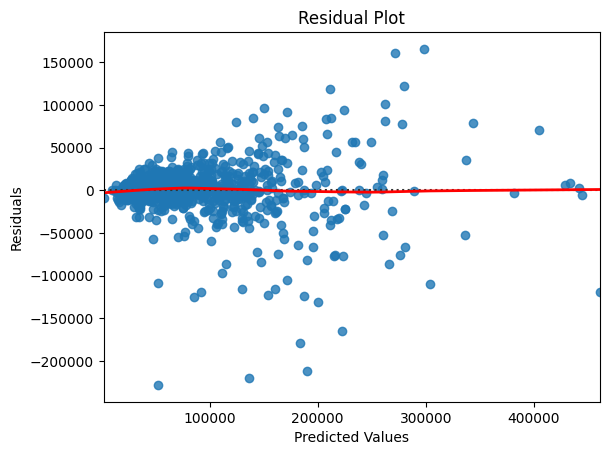

In [273]:
sns.residplot(data=xgb_resid, x='y_pred', y='Residual', lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## 9.5. Residual distribution plot

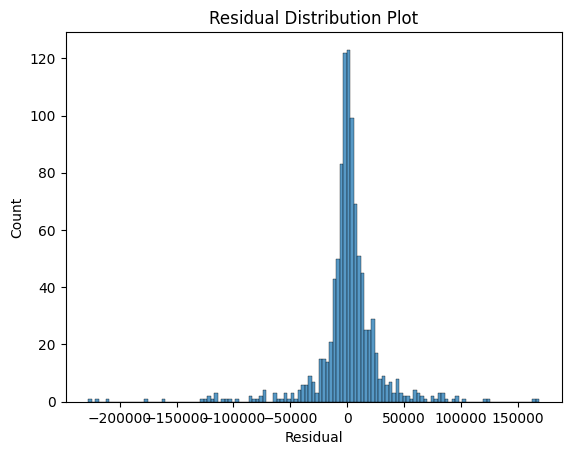

In [274]:
sns.histplot(xgb_resid['Residual']).set(title='Residual Distribution Plot')
plt.show()

In [275]:
# Checking Highest Residual
tes = xgb_resid.copy()
tes['Residual'] = tes['Residual']
tes = tes.sort_values(by='Residual', ascending=False)
tes.head()

,y_test,y_pred,Residual
272,130000,298807.87500,168807.87500
17,108000,271341.59375,163341.59375
36,155000,279634.71875,124634.71875
450,90000,211457.71875,121457.71875
66,159000,262537.21875,103537.21875


In [276]:
ratio_mape = xgb_resid.copy()
ratio_mape['APE'] = abs((ratio_mape['y_test'] - ratio_mape['y_pred']) / ratio_mape['y_test']) * 100
residuals_over_mape = ratio_mape[ratio_mape['APE'] > 21.7].shape[0]
residuals_under_mape = ratio_mape[ratio_mape['APE'] <= 21.7].shape[0]

print(f"Number of data for prediction : {y_test.shape[0]}")
print(f"Number of residuals OVER MAPE score of 21.7% : {residuals_over_mape}")
print(f"Number of residuals UNDER MAPE score of 21.7% : {residuals_under_mape}")


Number of data for prediction : 998
Number of residuals OVER MAPE score of 21.7% : 291
Number of residuals UNDER MAPE score of 21.7% : 707


## 9.6 Scatter plot

**Scatter Plot with a Trend Line :**
- A scatter plot of actual vs. predicted values can show the general trend without fitting a linear model.
- This plot provides a visual way to assess the relationship between actual and predicted values for your XGBoost regression model. By fitting a polynomial trend line, you can capture and interpret non-linear relationships that a simple linear trend line might miss, offering deeper insights into your model's performance.

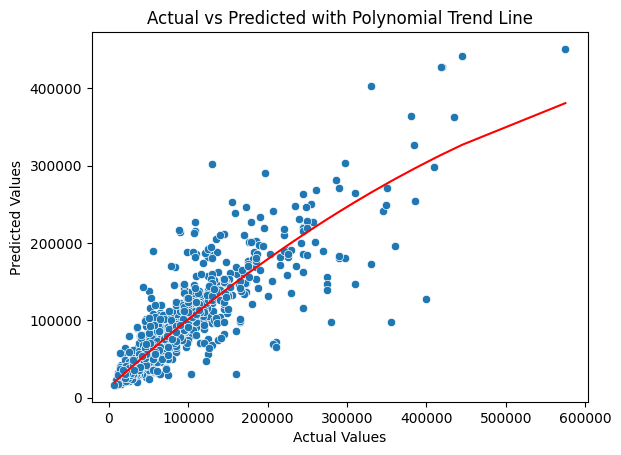

In [277]:
sns.scatterplot(x=y_test, y=y_pred)
sns.lineplot(x=y_test, y=np.poly1d(np.polyfit(y_test, y_pred, 2))(y_test), color='red')  # Fit a 2nd degree polynomial line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted with Polynomial Trend Line')
plt.show()

## 9.6. Feature importance

- Feature importance show the impact of each feature on the model's predictions.
- Identifies the most influential features in the model.

In [278]:
importances_tuned = xgb_tuned['Model'].feature_importances_
feature_names = xgb_tuned[:-1].get_feature_names_out()

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_tuned
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance

,Feature,Importance
32,Scaler__Year,0.099413
5,One Hot__Options_Full,0.081903
33,Scaler__Engine_Size,0.071905
29,Binary__Make_3,0.062019
26,Binary__Make_0,0.044374
30,Binary__Make_4,0.041180
9,Binary__Car_Type_1,0.040768
7,One Hot__Options_Standard,0.040525
27,Binary__Make_1,0.039799
10,Binary__Car_Type_2,0.035873


Text(0.5, 1.0, 'Feature Importances After Tuning')

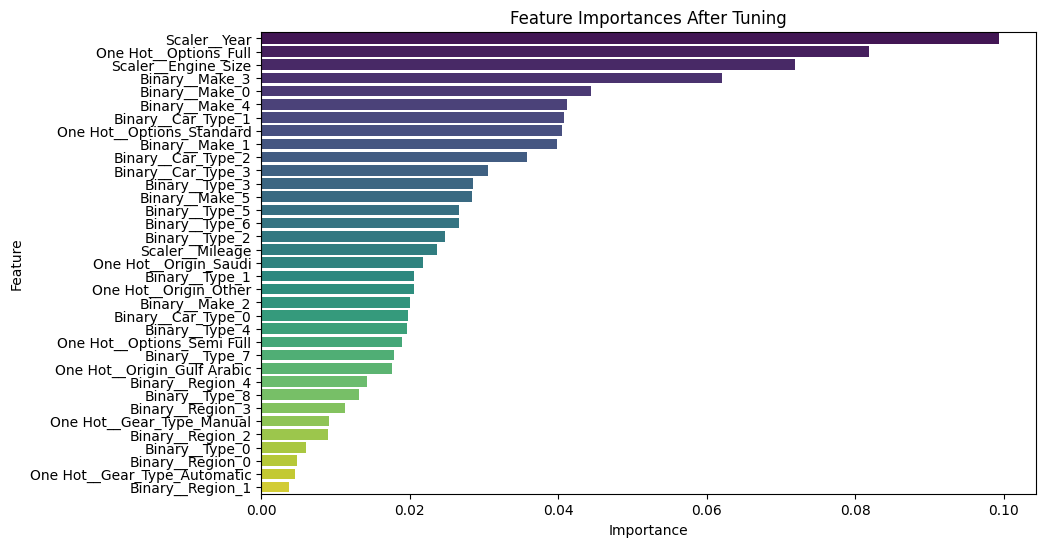

In [279]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importances After Tuning')

# 10. Prediction

## 10.1. Extreme prediction

In [310]:
cheap_car = pd.DataFrame({
    'Type' : ['Grand Max'],
    'Car_Type' : ['Al-Medina'],
    'Region' : ['Sabaya'],
    'Make' : ['Daihatsu'],
    'Gear_Type' : ['Manual'],
    'Origin' : ['Other'],
    'Options' : ['Semi Full'],
    'Year' : [2008],
    'Engine_Size' : [4.4],
    'Mileage' : ['225000'],
    'Car_Ttpe' : ['Pickup']
})

cheap_car

,Type,Car_Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Car_Ttpe
0,Grand Max,Al-Medina,Sabaya,Daihatsu,Manual,Other,Semi Full,2008,4.4,225000,Pickup


In [311]:
expensive_car = pd.DataFrame({
    'Type' : ['Bentayaga'],
    'Car_Type' : ['Al-Medina'],
    'Region' : ['Sakaka'],
    'Make' : ['Bentley'],
    'Gear_Type' : ['Automatic'],
    'Origin' : ['Saudi'],
    'Options' : ['Full'],
    'Year' : [2016],
    'Engine_Size' : [3.6],
    'Mileage' : ['10000'],
    'Car_Ttpe' : ['SUV']
})

expensive_car

,Type,Car_Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Car_Ttpe
0,Bentayaga,Al-Medina,Sakaka,Bentley,Automatic,Saudi,Full,2016,3.6,10000,SUV


In [313]:
loc_cheap = xgb_tuned.predict(cheap_car)
cheap_car['Prediction'] = loc_cheap
cheap_car

,Type,Car_Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Car_Ttpe,Prediction
0,Grand Max,Al-Medina,Sabaya,Daihatsu,Manual,Other,Semi Full,2008,4.4,225000,Pickup,31558.123047


In [314]:
loc_exp = xgb_tuned.predict(expensive_car)
expensive_car['Prediction'] = loc_exp
expensive_car

,Type,Car_Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Car_Ttpe,Prediction
0,Bentayaga,Al-Medina,Sakaka,Bentley,Automatic,Saudi,Full,2016,3.6,10000,SUV,130420.882812


In [282]:
# mape = 0.21
# lower_bound = loc_pred - (loc_pred * mape)
# upper_bound = loc_pred + (loc_pred * mape)
# new_test_data['Lower Price'] = lower_bound
# new_test_data['Upper Price'] = upper_bound
# new_test_data

,Type,Car_Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Prediction,Lower Price,Upper Price
0,Grand Cherokee,Al-Medina,Al-Medina,Jeep,Automatic,Saudi,Full,2015,5.7,215000,100706.562500,79558.187500,121854.937500
1,Creta,SUV,Besha,Hyundai,Automatic,Saudi,Full,2018,1.6,11800,81997.640625,64778.136719,99217.140625


## 10.2. Explainable AI

### SHAP

For XGBoost regression models, SHAP is generally preferred due to its consistency, strong theoretical foundation, and ability to provide both global and local explanations. It allows for a deeper and more reliable understanding of model behavior and feature importance.

- Provides detailed insights into feature contributions for individual predictions.

In [283]:
# pip install shap

In [284]:
import shap

model_final = xgb_tuned

# explainer
explainer = shap.Explainer(
    model_final[1].predict,
    model_final[0].transform(X_test)
)
shap_values = explainer( model_final[0].transform(X_test))

i = 1
X_test.iloc[i], y_test.iloc[i]

[i for i in enumerate(list_features)]

PermutationExplainer explainer: 999it [03:55,  4.06it/s]                         


[(0, 'Gear_Type_Automatic'),
 (1, 'Gear_Type_Manual'),
 (2, 'Origin_Gulf Arabic'),
 (3, 'Origin_Other'),
 (4, 'Origin_Saudi'),
 (5, 'Options_Full'),
 (6, 'Options_Semi Full'),
 (7, 'Options_Standard'),
 (8, 'Car_Type_0'),
 (9, 'Car_Type_1'),
 (10, 'Car_Type_2'),
 (11, 'Car_Type_3'),
 (12, 'Type_0'),
 (13, 'Type_1'),
 (14, 'Type_2'),
 (15, 'Type_3'),
 (16, 'Type_4'),
 (17, 'Type_5'),
 (18, 'Type_6'),
 (19, 'Type_7'),
 (20, 'Type_8'),
 (21, 'Region_0'),
 (22, 'Region_1'),
 (23, 'Region_2'),
 (24, 'Region_3'),
 (25, 'Region_4'),
 (26, 'Make_0'),
 (27, 'Make_1'),
 (28, 'Make_2'),
 (29, 'Make_3'),
 (30, 'Make_4'),
 (31, 'Make_5'),
 (32, 'Year'),
 (33, 'Engine_Size'),
 (34, 'Mileage')]

In [285]:
X_test_preprocessed = pd.DataFrame(model_final[0].transform(X_test))
X_test_preprocessed.columns = list_features
X_test_preprocessed

,Gear_Type_Automatic,Gear_Type_Manual,Origin_Gulf Arabic,Origin_Other,Origin_Saudi,Options_Full,Options_Semi Full,Options_Standard,Car_Type_0,Car_Type_1,...,Region_4,Make_0,Make_1,Make_2,Make_3,Make_4,Make_5,Year,Engine_Size,Mileage
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.50,-0.602740,-0.753982
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.25,1.643836,1.044248
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.75,-0.657534,0.068035
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.25,-0.109589,-0.115044
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.00,-0.383562,-0.716814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.25,1.424658,-0.851327
994,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.25,0.000000,0.911504
995,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.75,-0.712329,-0.159292
996,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.25,-0.383562,0.008850


PermutationExplainer explainer: 999it [04:07,  3.88it/s]                         


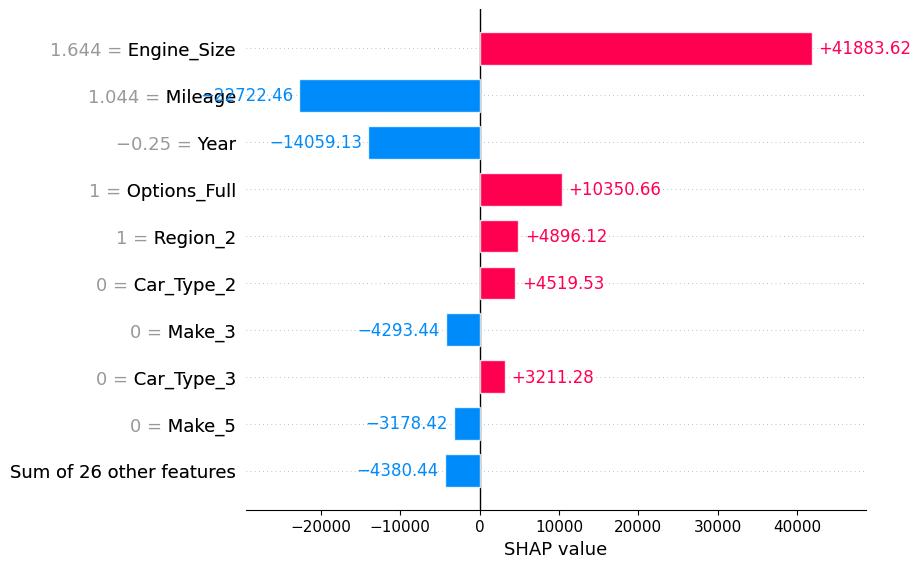

In [286]:
# Use the explainer object you created earlier
shap_values = explainer(model_final[0].transform(X_test))

i = 1

# Set feature names for the entire shap_values object
# Convert the Index object to a list
shap_values.feature_names = list(X_test_preprocessed.columns)

# Plot the SHAP values
shap.plots.bar(shap_values[i])

In [287]:
# Transform the training data
X_train_trans = model_final[0].transform(X_train)

# Create the SHAP explainer for a regression model
explainer = shap.TreeExplainer(
    model=model_final.named_steps['Model'],
    data=X_train_trans,
    feature_perturbation='interventional',
    model_output='raw'  # 'raw' is suitable for regression models
)

# Compute SHAP values for the training data
shap_values = explainer.shap_values(X_train_trans)

# If using XGBoost or similar, you might need to flatten the shap_values
# as it can return a list with a single array for regression tasks.
if isinstance(shap_values, list) and len(shap_values) == 1:
    shap_values = shap_values[0]

shap_values

 99%|===================| 2314/2328 [01:22<00:00]        

array([[ 1.35715135e+01, -3.60608959e+00, -3.83353924e+02, ...,
         1.30876873e+04, -3.38872095e+04,  8.27675191e+02],
       [-2.33378488e+03, -4.94191103e-01, -1.93931583e+02, ...,
         1.61397826e+04, -1.05671597e+04,  7.65583517e+03],
       [ 7.19778686e+01,  2.06401823e+01, -1.03037786e+03, ...,
         2.05479876e+03, -3.73647136e+04,  6.82893670e+03],
       ...,
       [ 2.05573890e+02,  1.95055861e+01, -3.96245679e+02, ...,
         3.19503597e+04, -5.57781698e+04,  9.45981491e+03],
       [ 8.76173394e+01, -1.97942610e+00, -4.87554166e+02, ...,
         2.86012241e+03, -1.36245973e+04, -4.32963516e+03],
       [ 1.48521212e+02,  6.06323694e+01, -2.60421470e+02, ...,
        -6.15443146e+04,  3.67276835e+04,  1.17886024e+03]])

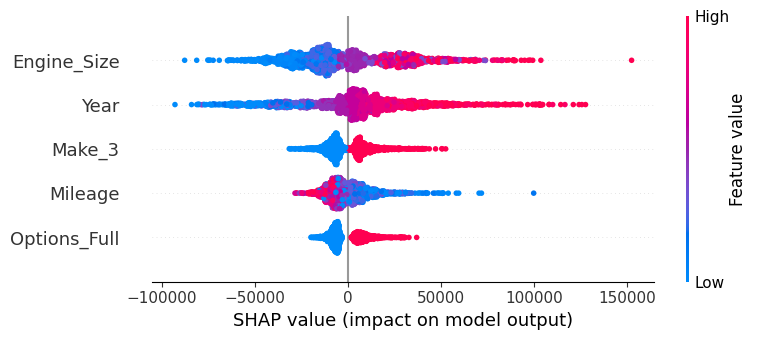

In [302]:
# summary plot for model in trans
shap.summary_plot(
    shap_values,
    X_train_trans,
    feature_names=list_features,
    max_display = 5
)

In [289]:
# # shap js
# def shap_plot(idx, model, dataset):
#     explainerModel = shap.TreeExplainer(model)
#     shap_values_model = explainerModel.shap_values(dataset)
#     p = shap.force_plot(explainerModel.expected_value, shap_values_model[idx], dataset.iloc[[idx]])
#     return(p)

In [290]:
X_test.iloc[0]
# , y_test.iloc[0]

Type               Creta
Car_Type             SUV
Region             Besha
Make             Hyundai
Gear_Type      Automatic
Origin             Saudi
Options             Full
Year                2018
Engine_Size          1.6
Mileage            11800
Name: 438, dtype: object

In [291]:
shap.initjs()

In [292]:
# i = 3  # i nya bisa diganti2 jadi 2,100,etc

# predicted_price = model_final['Model'].predict([X_test_preprocessed.iloc[i]])[0]
# actual_price = y_test.iloc[i]

# print(f'The predicted price of this car is: {predicted_price:.2f} SAR --> Actual price: {actual_price:.2f} SAR')

In [293]:
# i = 2  # i nya bisa diganti2 jadi 2,100,etc

# predicted_price = model_final['Model'].predict([X_test_preprocessed.iloc[i]])[0]
# actual_price = y_test.iloc[i]

# print(f'The predicted price of this car is: {predicted_price:.2f} SAR --> Actual price: {actual_price:.2f} SAR')

In [304]:
def predict_and_analyze(i, model, X_test_preprocessed, y_test, df):
    predicted_price = model.predict([X_test_preprocessed.iloc[i]])[0]
    actual_price = y_test.iloc[i]

    difference = actual_price - predicted_price

    make = df.iloc[i]['Make']
    car_type = df.iloc[i]['Car_Type']

    mape = 0.21  # assume MAPE is 21%

    lower_bound = predicted_price - (predicted_price * mape)
    upper_bound = predicted_price + (predicted_price * mape)

    avg_price_make_type = y_test[(df['Make'] == make) & (df['Car_Type'] == car_type)].mean()

    print(f'The predicted price of this {make} - {car_type} is: {predicted_price:.2f} SAR --> Actual price: {actual_price:.2f} SAR')
    print(f'Difference: {difference:.2f} SAR')
    print(f'Range price for {make} - {car_type}: {lower_bound:.2f} SAR - {upper_bound:.2f} SAR')
    print(f'Average price for {make} - {car_type}: {avg_price_make_type:.2f} SAR')

    # # Compute SHAP values using TreeExplainer
    # explainer = shap.TreeExplainer(model)
    # shap_values = explainer.shap_values(X_test_preprocessed)

    # # Plot SHAP values
    # shap.plots.bar(shap_values[i])

# Example usage:
i = 3  # change this to any index you want
predict_and_analyze(i, model_final['Model'], X_test_preprocessed, y_test, df)

The predicted price of this Porsche - SUV is: 60343.64 SAR --> Actual price: 45000.00 SAR
Difference: -15343.64 SAR
Range price for Porsche - SUV: 47671.48 SAR - 73015.81 SAR
Average price for Porsche - SUV: 161400.00 SAR


# 12. Conclusion

- **Model Performance**: The XGBoost regression model, after tuning, showed strong performance with high R2 and adjusted R2 scores, indicating it can effectively predict used car prices.
- **Feature Importance**: Key features influencing the price include **Year**, **Engine Size**, **Mileage**, and **Car Type**.

## 12.1. Recommendation

- **Data Enrichment**: Incorporate additional features like **car condition** and **service history** to improve model accuracy.
- **Regular Updates**: Continuously update the model with new data to adapt to changing market trends.
- **Customer Segmentation**: Use the model to identify high-value customer segments and tailor marketing strategies accordingly.

# 13. Save

## 13.1. Save model

In [295]:
# import pickle

# final_model = xgb_tuned
# file_name = 'hadi_xgboost_026.pkl'
# pickle.dump(final_model, open(file_name, 'wb'))

## 13.2. Save dataset

In [296]:
# X_test.to_csv('data_test_SAUC_syarah.csv', index=False)

In [297]:
# df.to_csv('clean_dataset_SAUC_syarah.csv', index=False)

# GCP

In [298]:
# pip list